# Part 1 | Visualizing Economic Data

## Part 1.8 | Time Series

In [169]:
from Weidman_Figures import *

cpi = pd.read_csv('Data/Part_1_8_CPI_raw.csv')

cpi.Year = cpi.Year.astype(int)
cpi = cpi[cpi.Year >= 1970]
cpi['I'] = cpi['Annual Percent Change (rate of inflation)'].str.replace('%', '').astype(float)/100
cpi['cpi'] = cpi['Annual Average CPI(-U)'].astype(float)

""" 1970's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[0]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['base'] = values

""" Today's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[-1]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['today'] = values

cpi.to_csv('Data/Part_1_8_CPI.csv')

In [6]:
from Weidman_Figures import *

data = pd.read_csv('Data/Part_1_8_Coffee_Prices.csv')
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[(data['year'] < 2023)]

cpi = pd.read_csv('Data/Part_1_8_CPI.csv')

today_list = []
cpi_list = []
for i,row in data.iterrows():
    cpi_year = cpi[cpi.Year == row.year]
    year = row.year
    today_list.append(cpi_year.today.iloc[0])
    cpi_list.append(cpi_year.cpi.iloc[0])
    
data['today'] = today_list
data['cpi'] = cpi_list
data.to_csv('Data/Part_1_8_Coffee_Prices_CPI.csv')

In [20]:
from Weidman_Figures import *

data = pd.read_csv('Data/Part_1_8_Coffee_Prices.csv')

data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year_month'] = data['date'].dt.to_period('M')

monthly_avg = data.groupby('year_month')[' value'].mean().reset_index()
monthly_avg = monthly_avg.rename(columns={' value': 'price'})
monthly_avg['year'] = monthly_avg['year_month'].dt.year
monthly_avg['month'] = monthly_avg['year_month'].dt.month

monthly_avg.to_csv('Data/Part_1_8_Monthly_Coffee_Prices.csv')

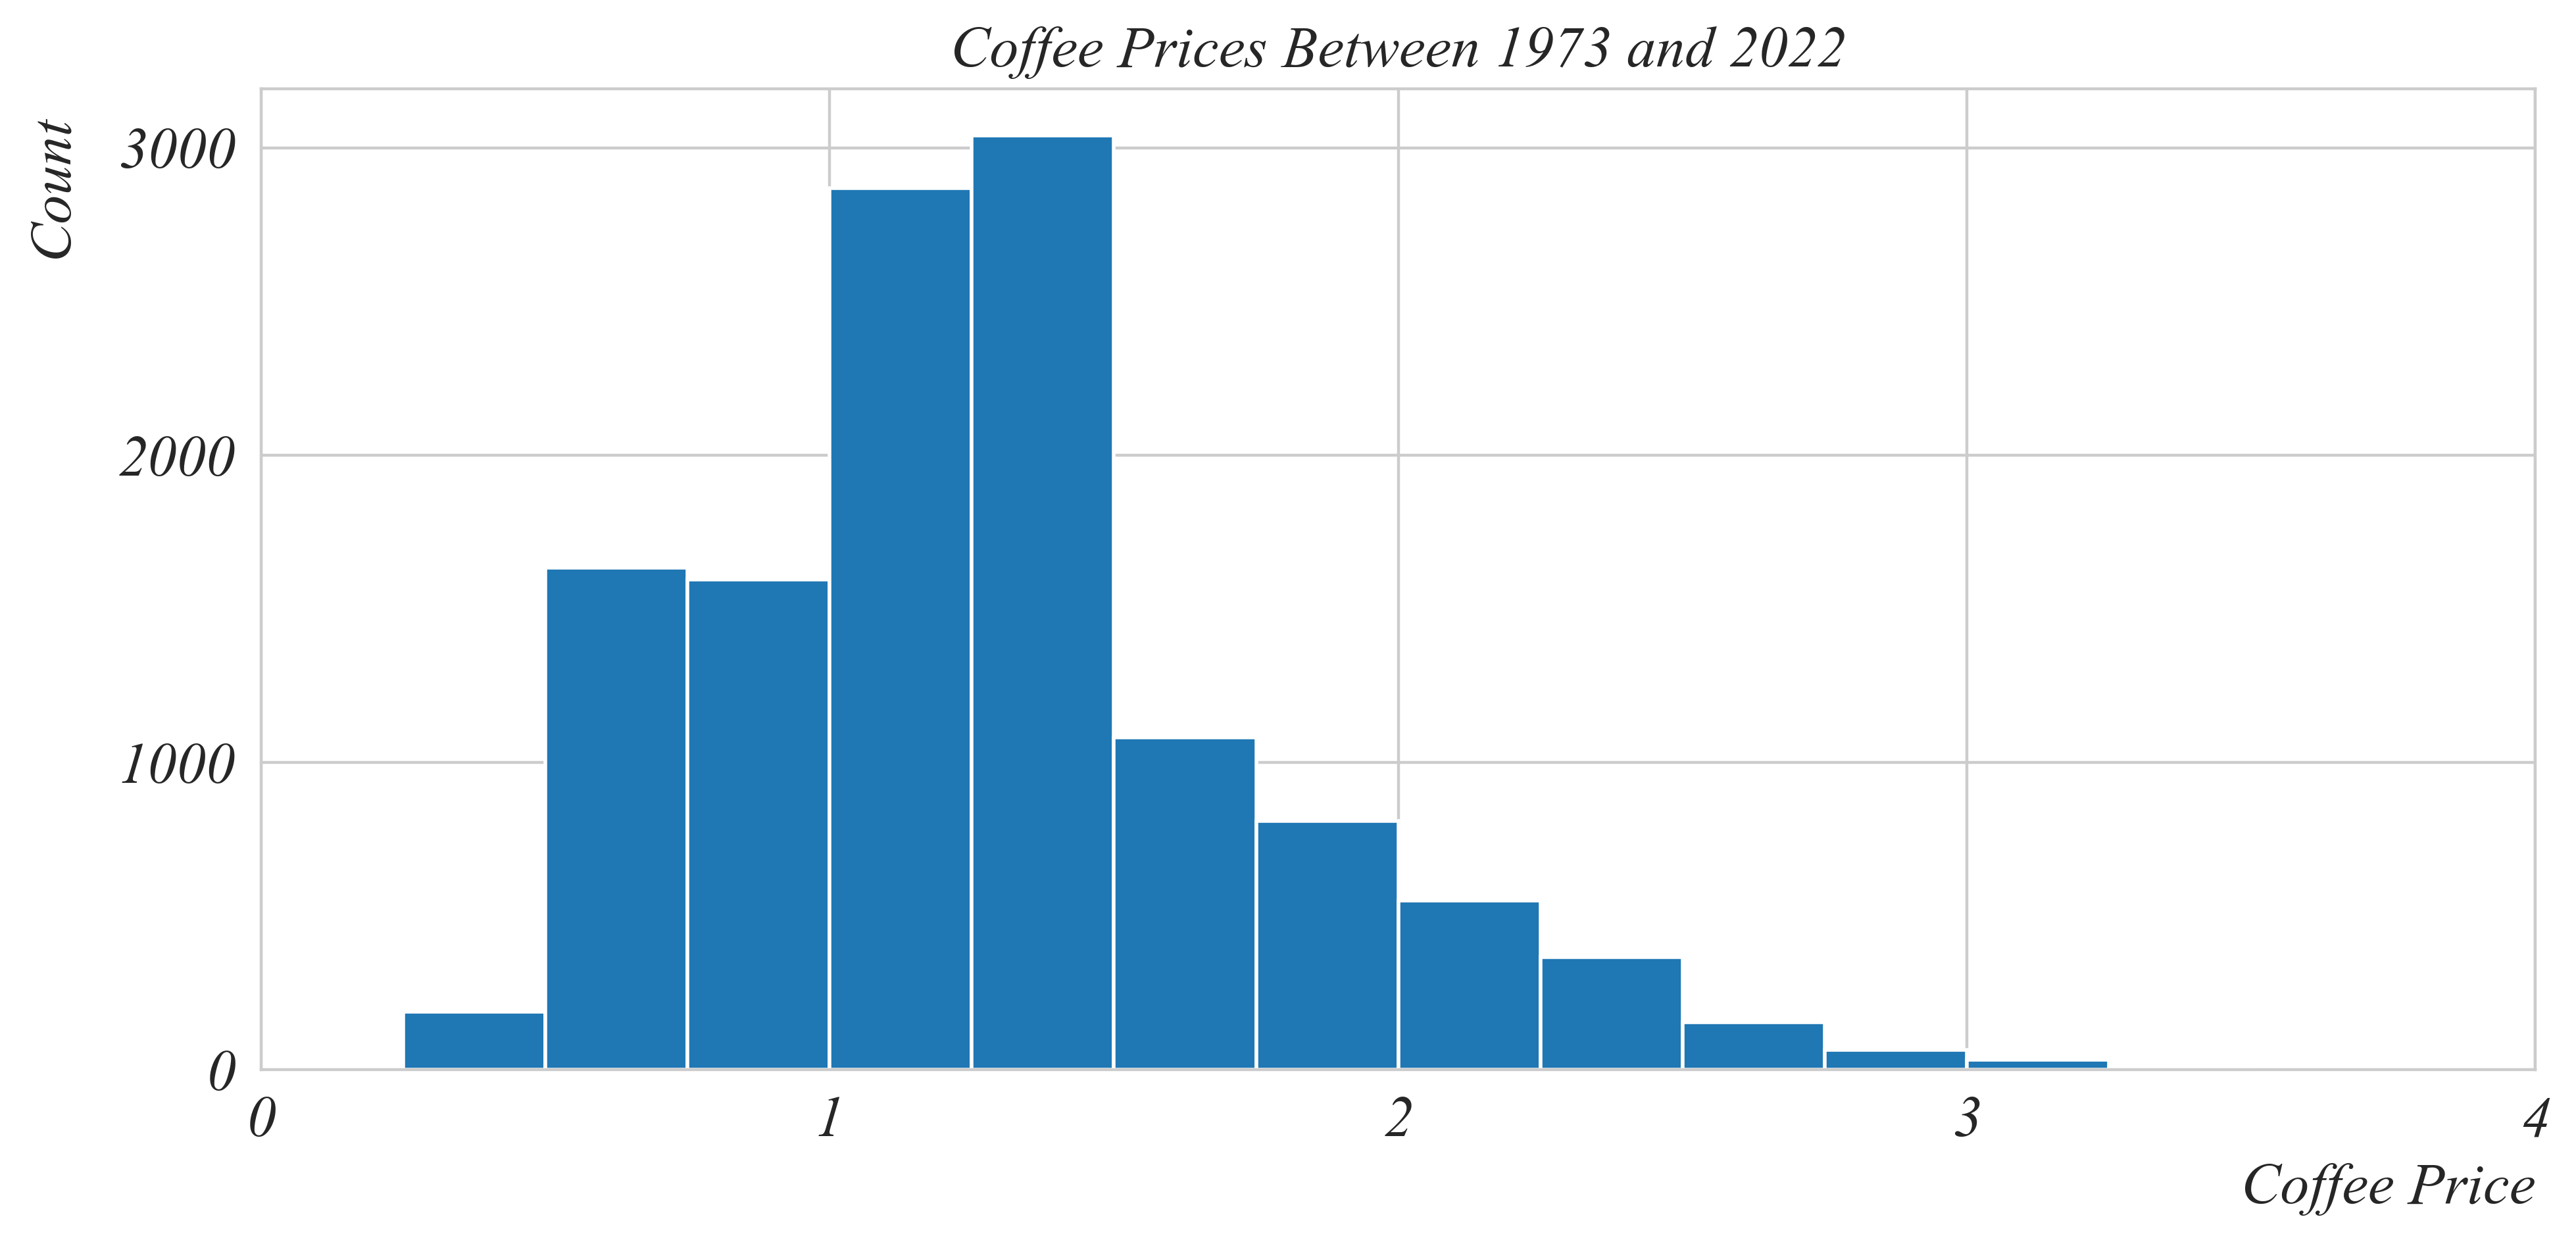

In [95]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=5)

data = pd.read_csv('Data/Part_1_8_Coffee_Prices.csv')
data.rename(columns = {' value':'value'}, inplace=True)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
# Assuming your DataFrame is named 'data' and the date column is 'date_column'
data = data[data['year'] < 2023]
data['value'].hist(bins=np.arange(0,4+0.25,0.25))
#plt.plot(data_2021['date_column'], data_2021['value'])
#data.plot(y='value', x='date_column', kind='line', ax=ax)

plt.xlabel('Coffee Price', loc='right')
plt.xticks(np.arange(0,4+1,1))
plt.xlim(0,4)
plt.ylabel('Count')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, .9)
plt.yticks([0,1000,2000,3000])
plt.title('Coffee Prices Between 1973 and 2022')
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure01.png')

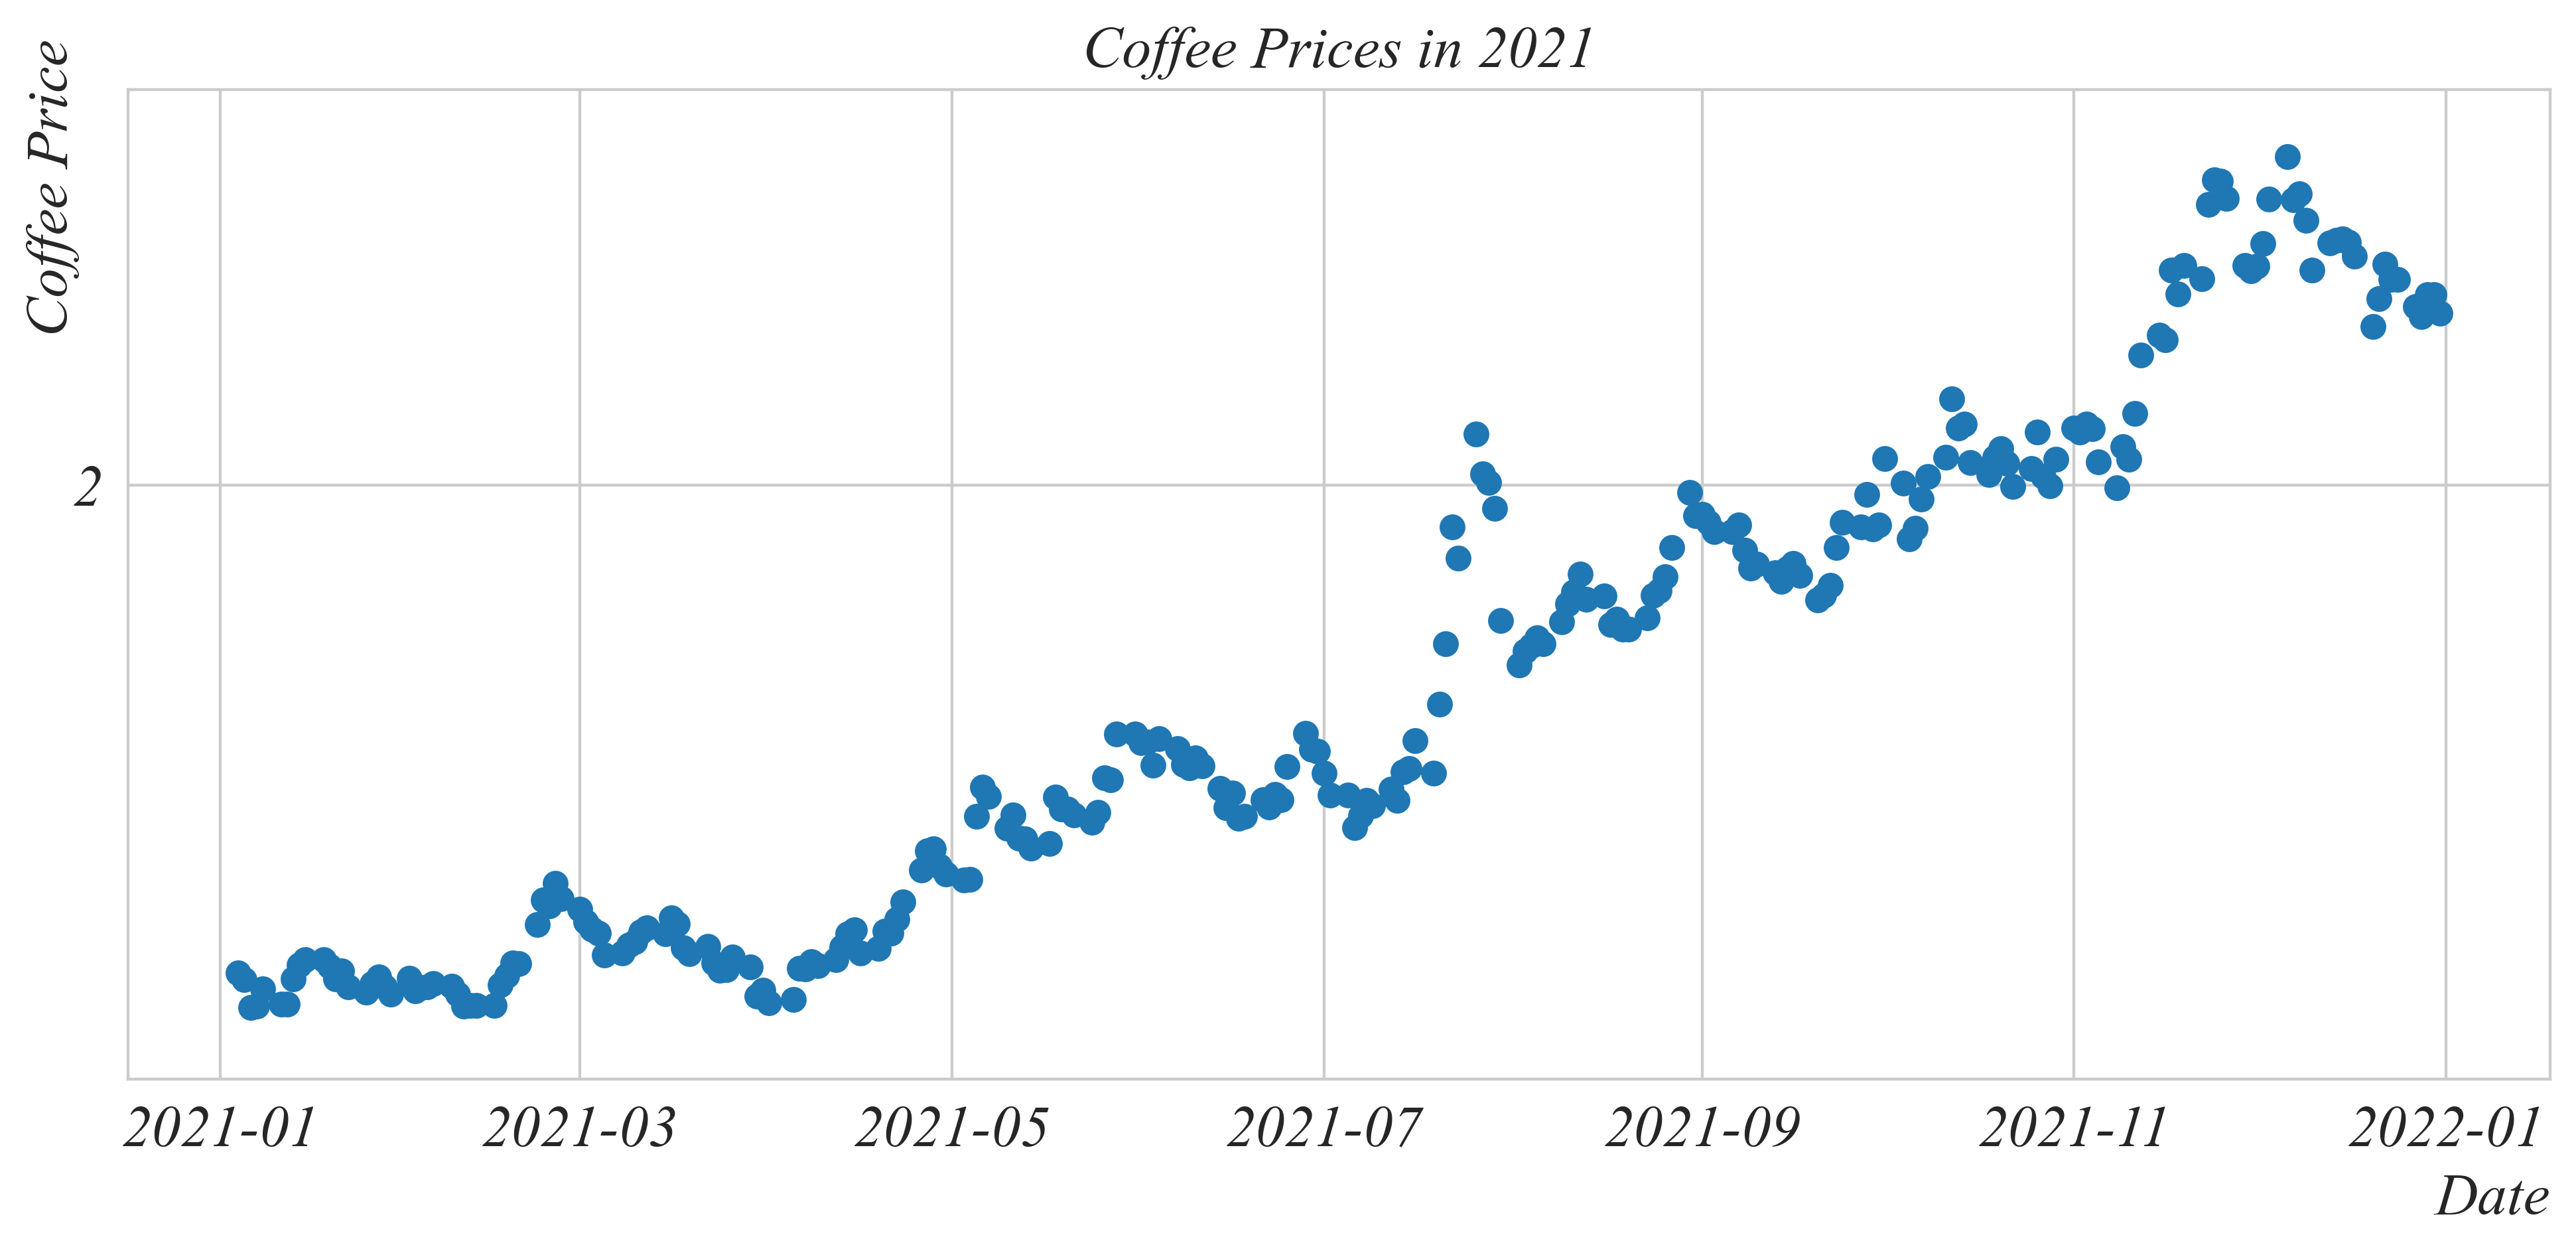

In [9]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=5)

data = pd.read_csv('Data/Part_1_8_Coffee_Prices.csv')
data.rename(columns = {' value':'value'}, inplace=True)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[data['year'] == 2021]

plt.scatter(data['date_column'], data['value'])
#data.plot(y='value', x='date_column', kind='line', ax=ax)

plt.xlabel('Date', loc='right')
#plt.xticks(np.arange(0,4+1,1))
#plt.xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-12-31'))
plt.ylabel('Coffee Price')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.02, .9)
plt.yticks(np.arange(0,4+1,1))
plt.ylim(1.1,2.6)
plt.title('Coffee Prices in 2021')
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure02.png')


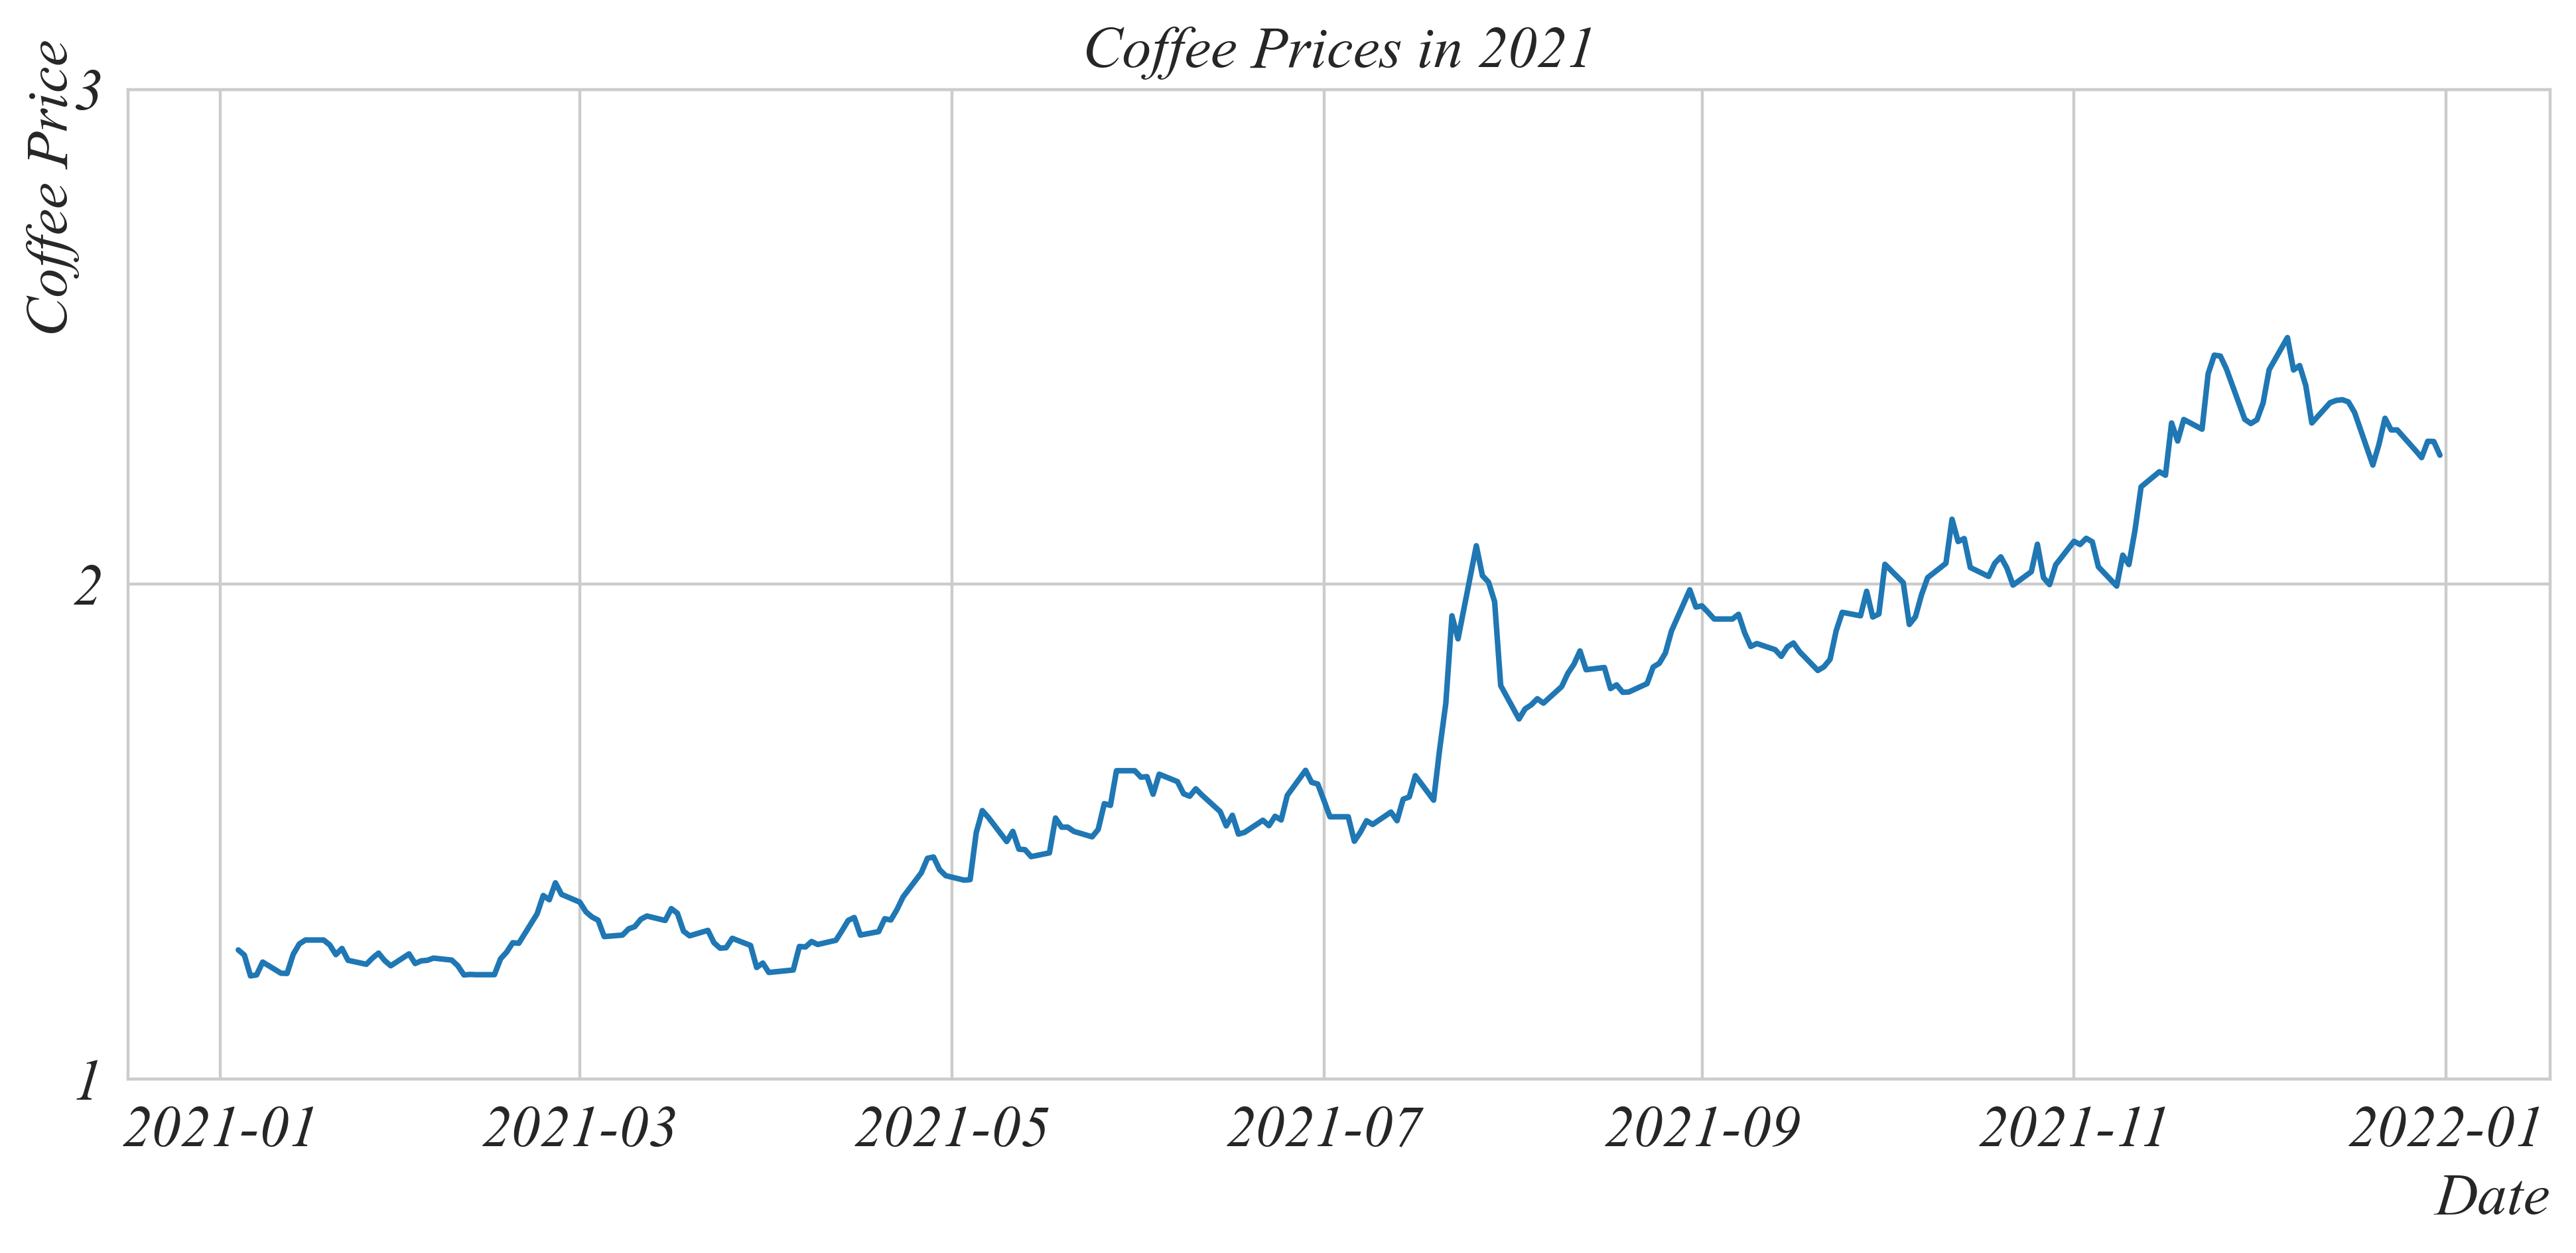

In [8]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=5)

data = pd.read_csv('Data/Part_1_8_Coffee_Prices.csv')
data.rename(columns = {' value':'value'}, inplace=True)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[data['year'] == 2021]

plt.plot(data['date_column'], data['value'])
#data.plot(y='value', x='date_column', kind='line', ax=ax)

plt.xlabel('Date', loc='right')
plt.ylabel('Coffee Price')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.02, .9)
plt.yticks(np.arange(0,4+1,1))
plt.ylim(1,3)
plt.title('Coffee Prices in 2021')
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure03.png')


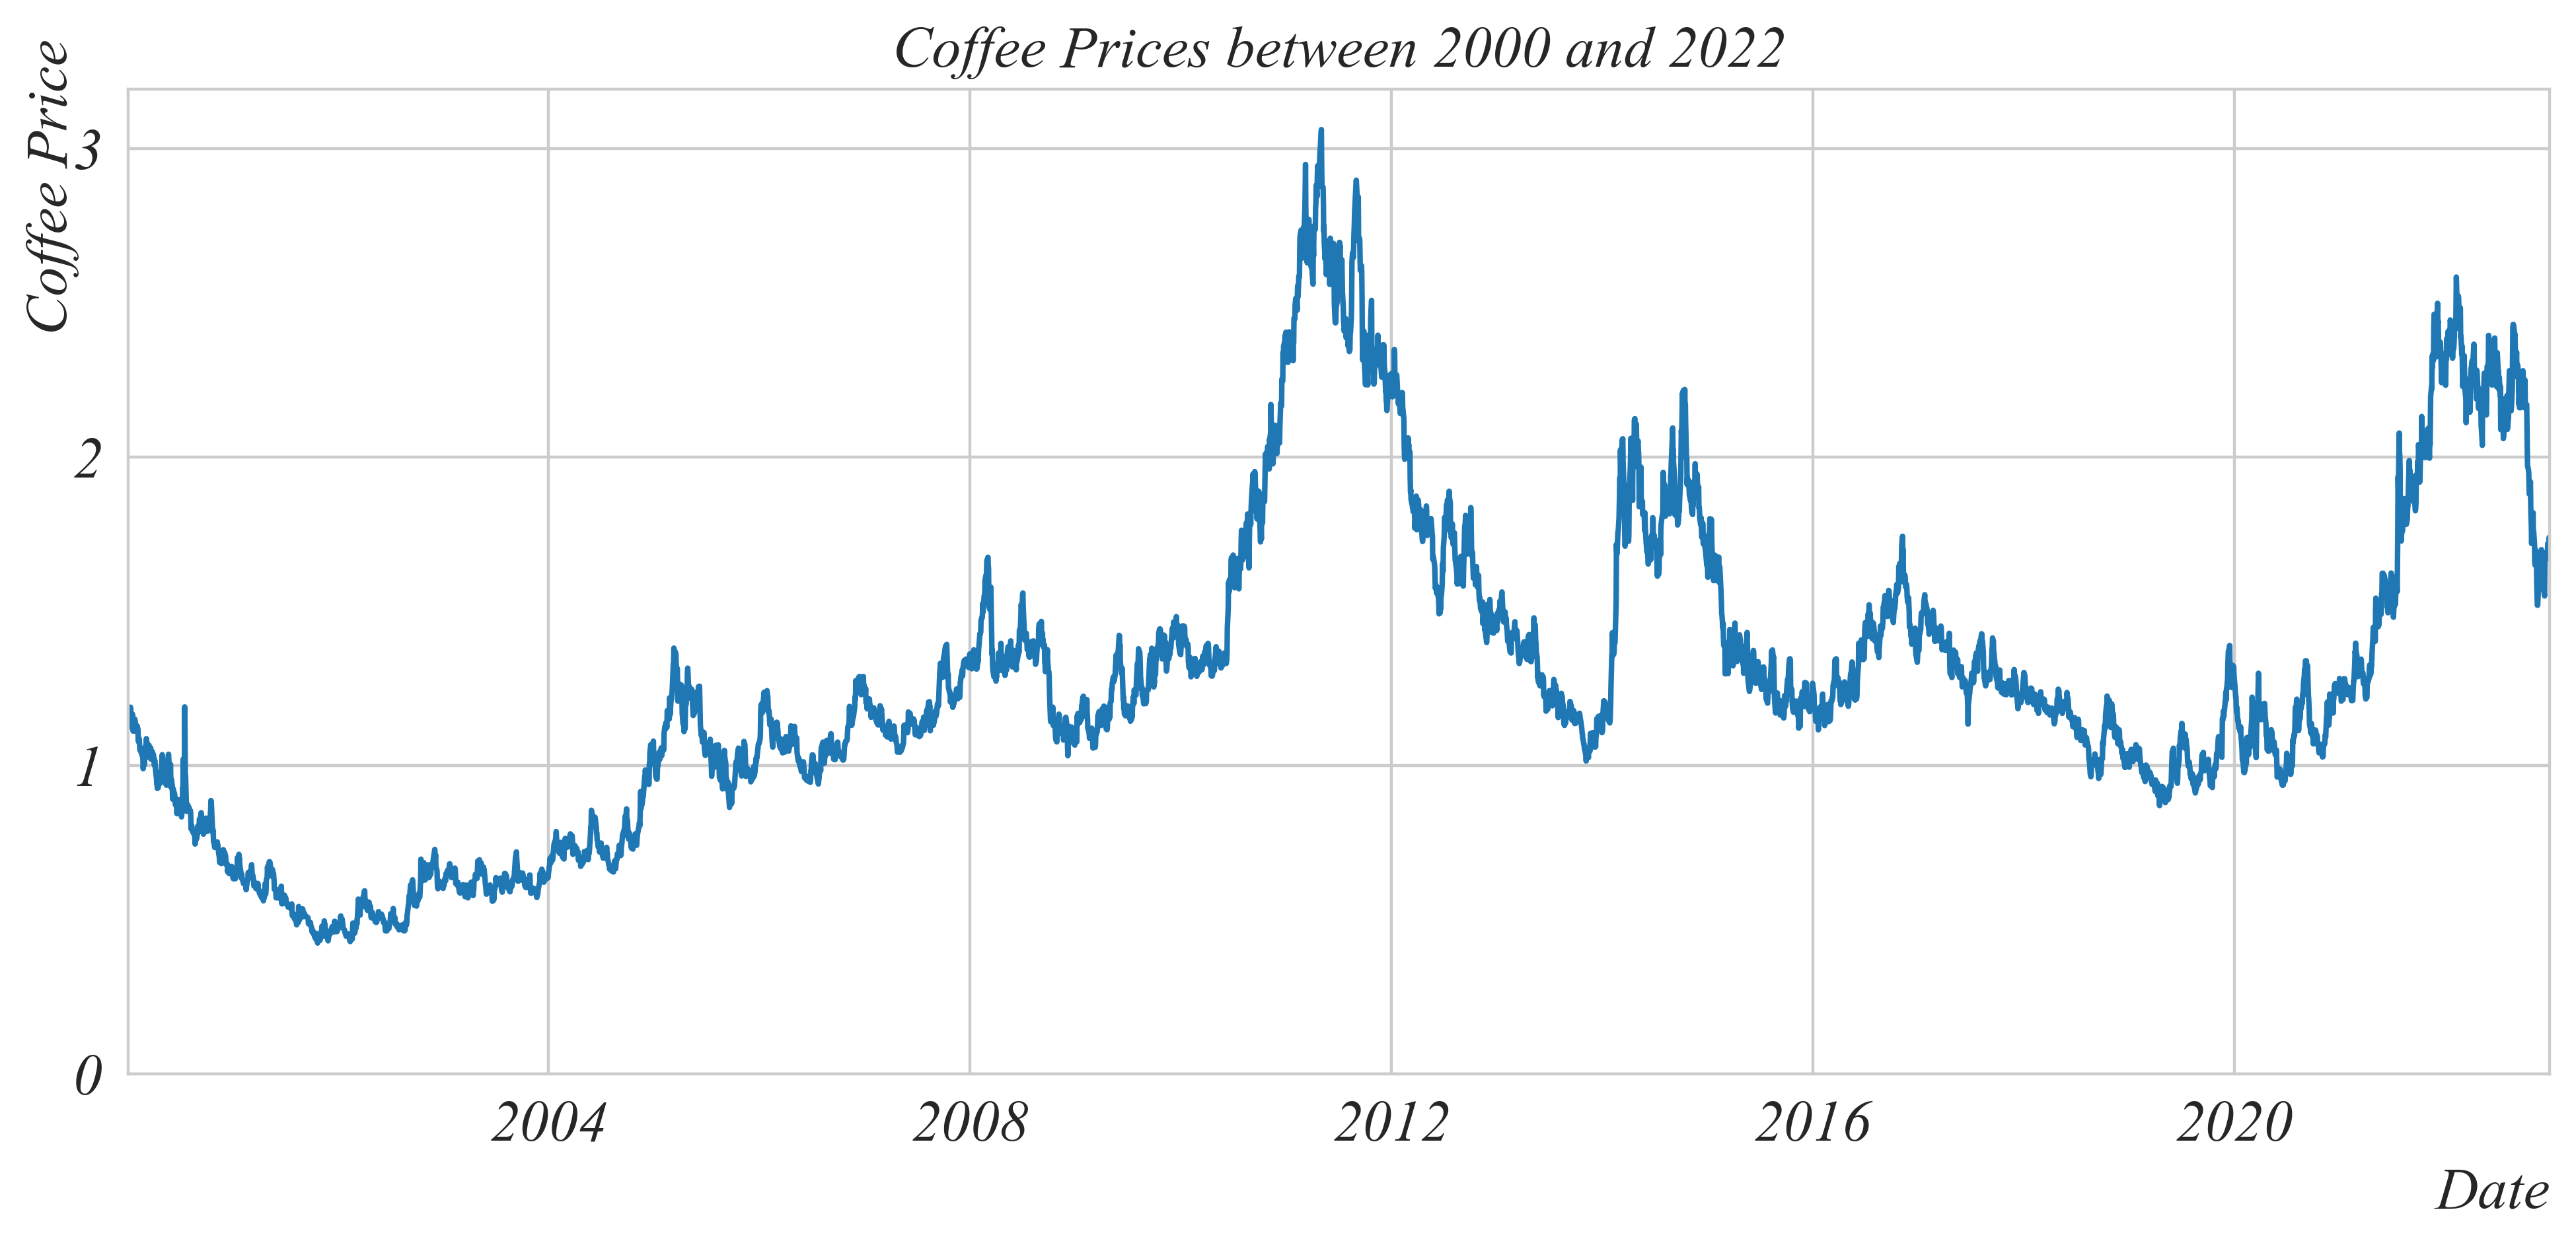

In [10]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=5)

data = pd.read_csv('Data/Part_1_8_Coffee_Prices.csv')
data.rename(columns = {' value':'value'}, inplace=True)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[(data['year'] < 2023) & (data['year'] > 1999)]

plt.plot(data['date_column'], data['value'])

plt.xlabel('Date', loc='right')
ax.set_xlim(data['date_column'].min(), data['date_column'].max())
plt.ylabel('Coffee Price')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.02, .9)
plt.yticks(np.arange(0,3+1,1))
#plt.ylim(1.1,2.6)
plt.title('Coffee Prices between 2000 and 2022')
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure04.png')


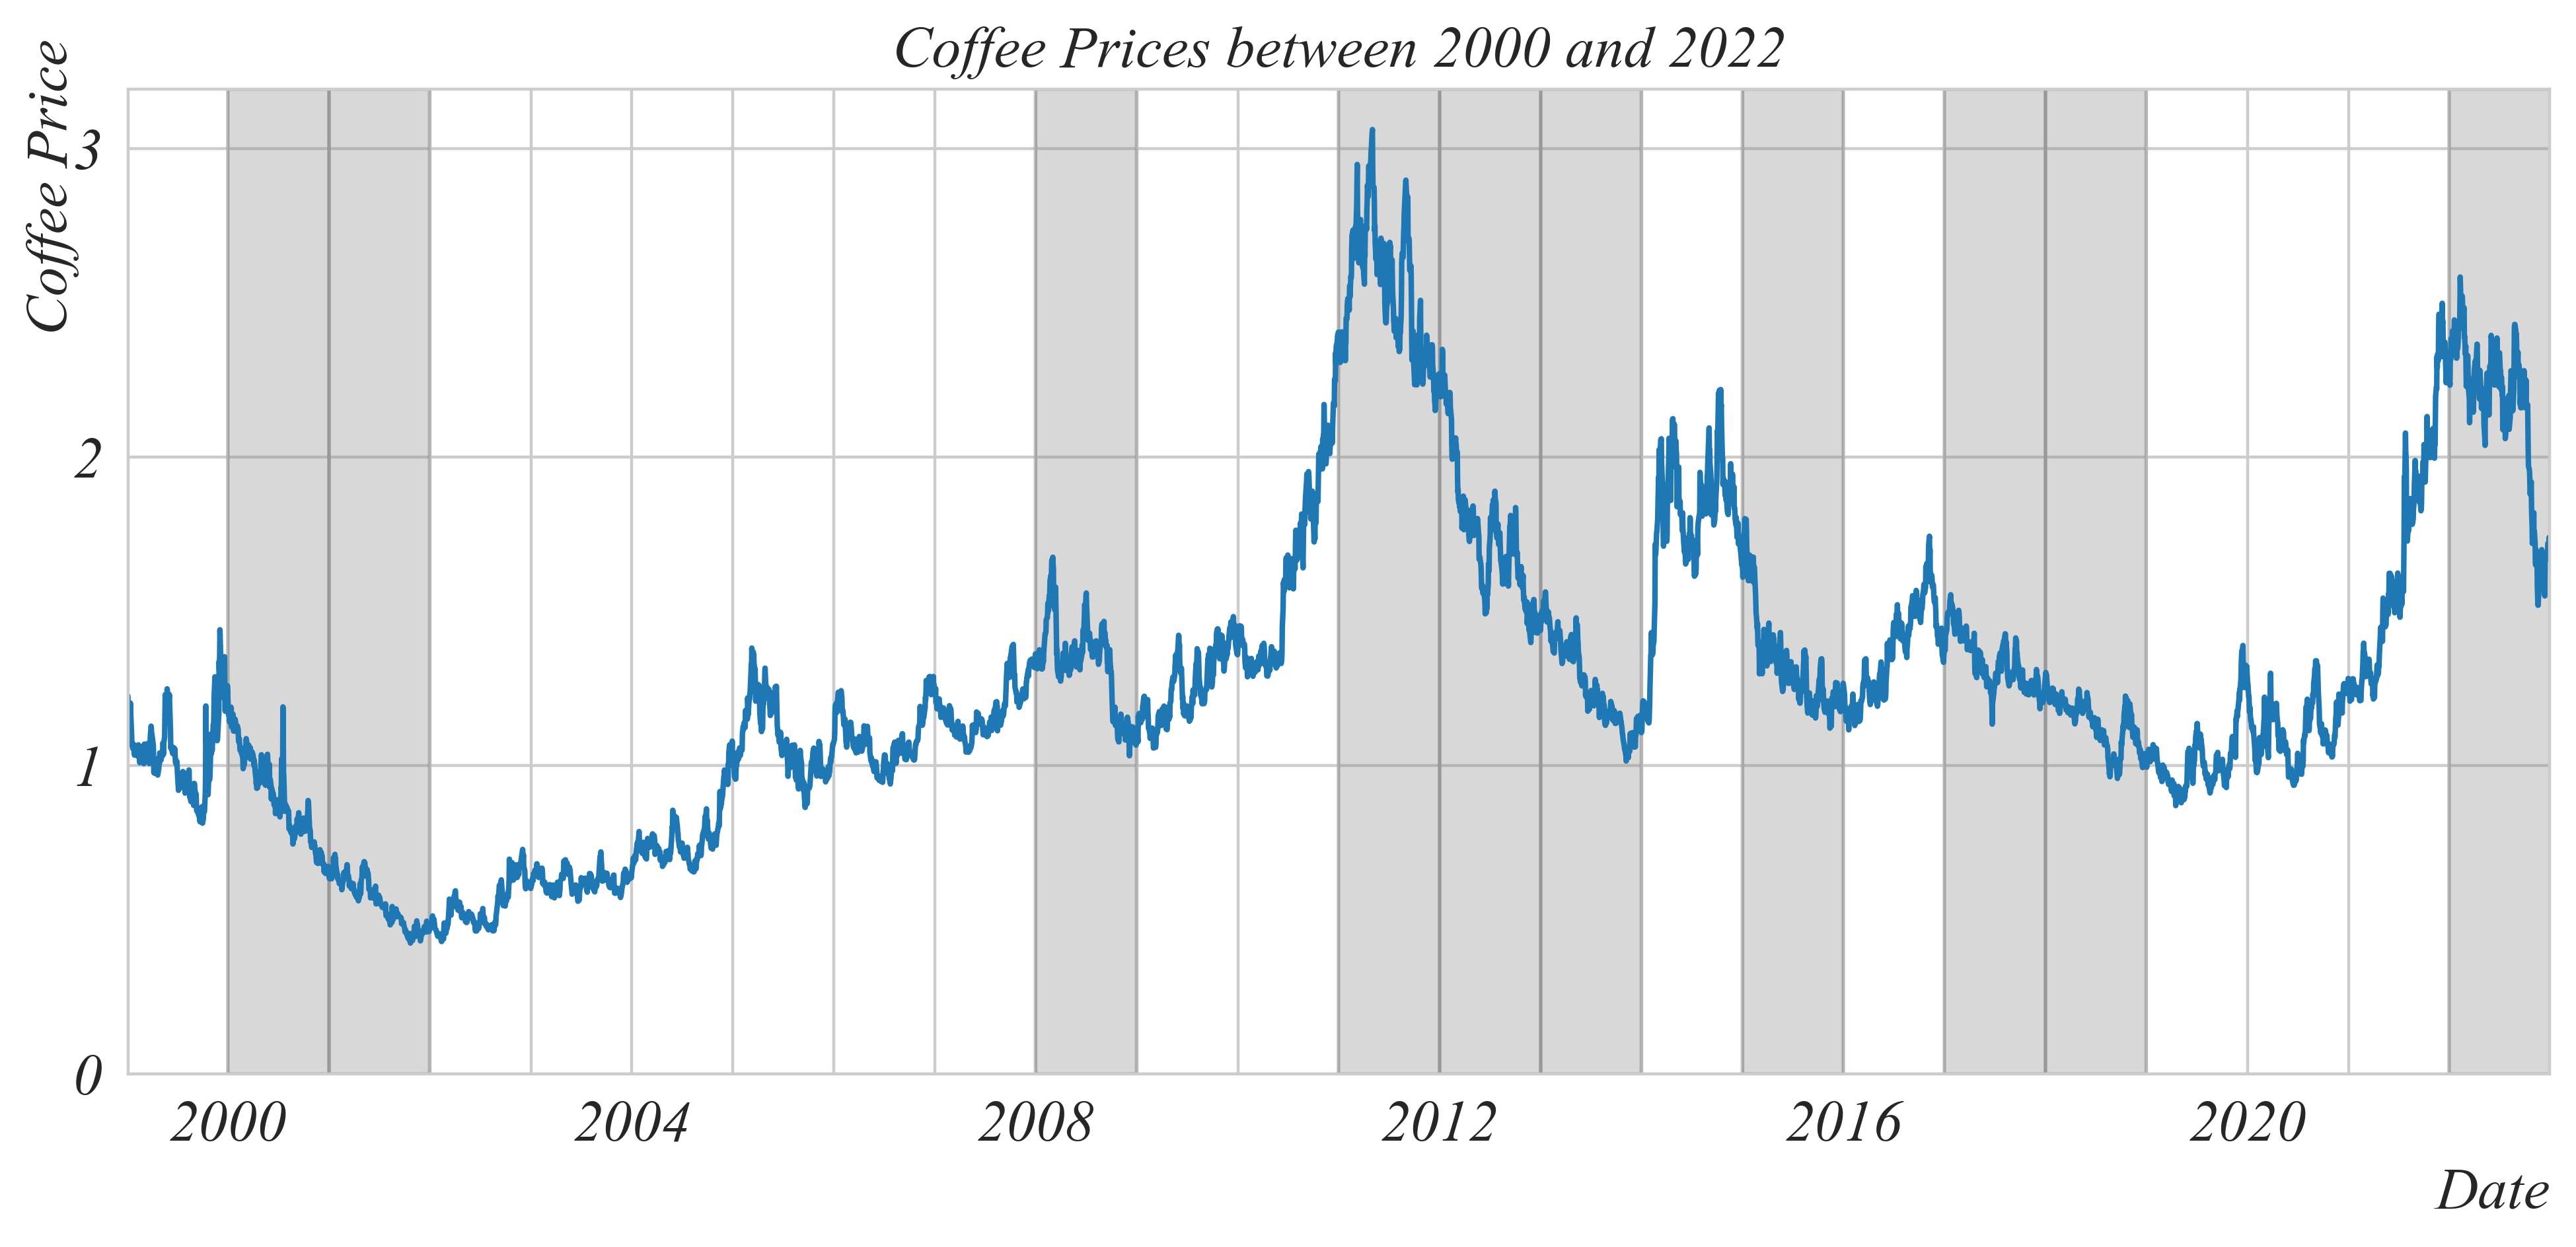

In [100]:
from Weidman_Figures import *
import matplotlib.dates as mdates
    
fig, ax = Weid_Fig(height=5)

data = pd.read_csv('Data/Part_1_8_Coffee_Prices.csv')
data.rename(columns = {' value':'value'}, inplace=True)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[(data['year'] < 2023) & (data['year'] > 1998)]

plt.plot(data['date_column'], data['value'])


data['date_column'] = pd.to_datetime(data['date_column'])

# Resample to quarterly frequency (start of the quarter)
quarterly_data = data.resample('Y', on='date_column').agg({'value': ['first', 'last']})
quarterly_data.columns = ['first_value', 'last_value']

# Create a column for the difference between the first and last values of each quarter
quarterly_data['change'] = quarterly_data['last_value'] - quarterly_data['first_value']

# Iterate over the quarters and highlight regions with negative change
for i in range(len(quarterly_data)):
    if quarterly_data['change'].iloc[i] < 0:  # If there's a negative trend in the quarter
        start = quarterly_data.index[i-1]  # Start of the quarter
        end = start + pd.offsets.YearEnd()  # End of the quarter
        ax.axvspan(start, end, color='grey', alpha=0.3)

plt.xlabel('Date', loc='right')
xticks = pd.date_range(start=data['date_column'].min(), 
                       end=data['date_column'].max(), 
                       freq='YS')
ax.set_xticks(xticks)
xticklabels = [date.strftime('%Y') if date.year % 4 == 0 else '' for date in xticks]
ax.set_xticklabels(xticklabels)
ax.set_xlim(data['date_column'].min(), data['date_column'].max())

plt.ylabel('Coffee Price')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.02, .9)
plt.yticks(np.arange(0,3+1,1))
#plt.ylim(1.1,2.6)
plt.title('Coffee Prices between 2000 and 2022')
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure05.png')


In [ ]:
from Weidman_Figures import *
import matplotlib.dates as mdates
    
fig, ax = Weid_Fig(height=5)

data = pd.read_csv('Data/Part_1_8_Coffee_Prices.csv')
data.rename(columns = {' value':'value'}, inplace=True)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[(data['year'] < 2023)]

plt.plot(data['date_column'], data['value'])

cpi = pd.read_csv('Data/Part_1_8_CPI.csv')
cpi['Date'] = pd.to_datetime(cpi['Year'].astype(str) + '-01-01')

plt.xlabel('Date', loc='right')
ax.set_xlim(data['date_column'].min(), data['date_column'].max())

plt.ylabel('Coffee Price')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.03, .9)
plt.yticks(np.arange(0,8+1,1))
#plt.ylim(1.1,2.6)
plt.title('Coffee Prices and CPI between 1974 and 2022')
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure06_pre.png')


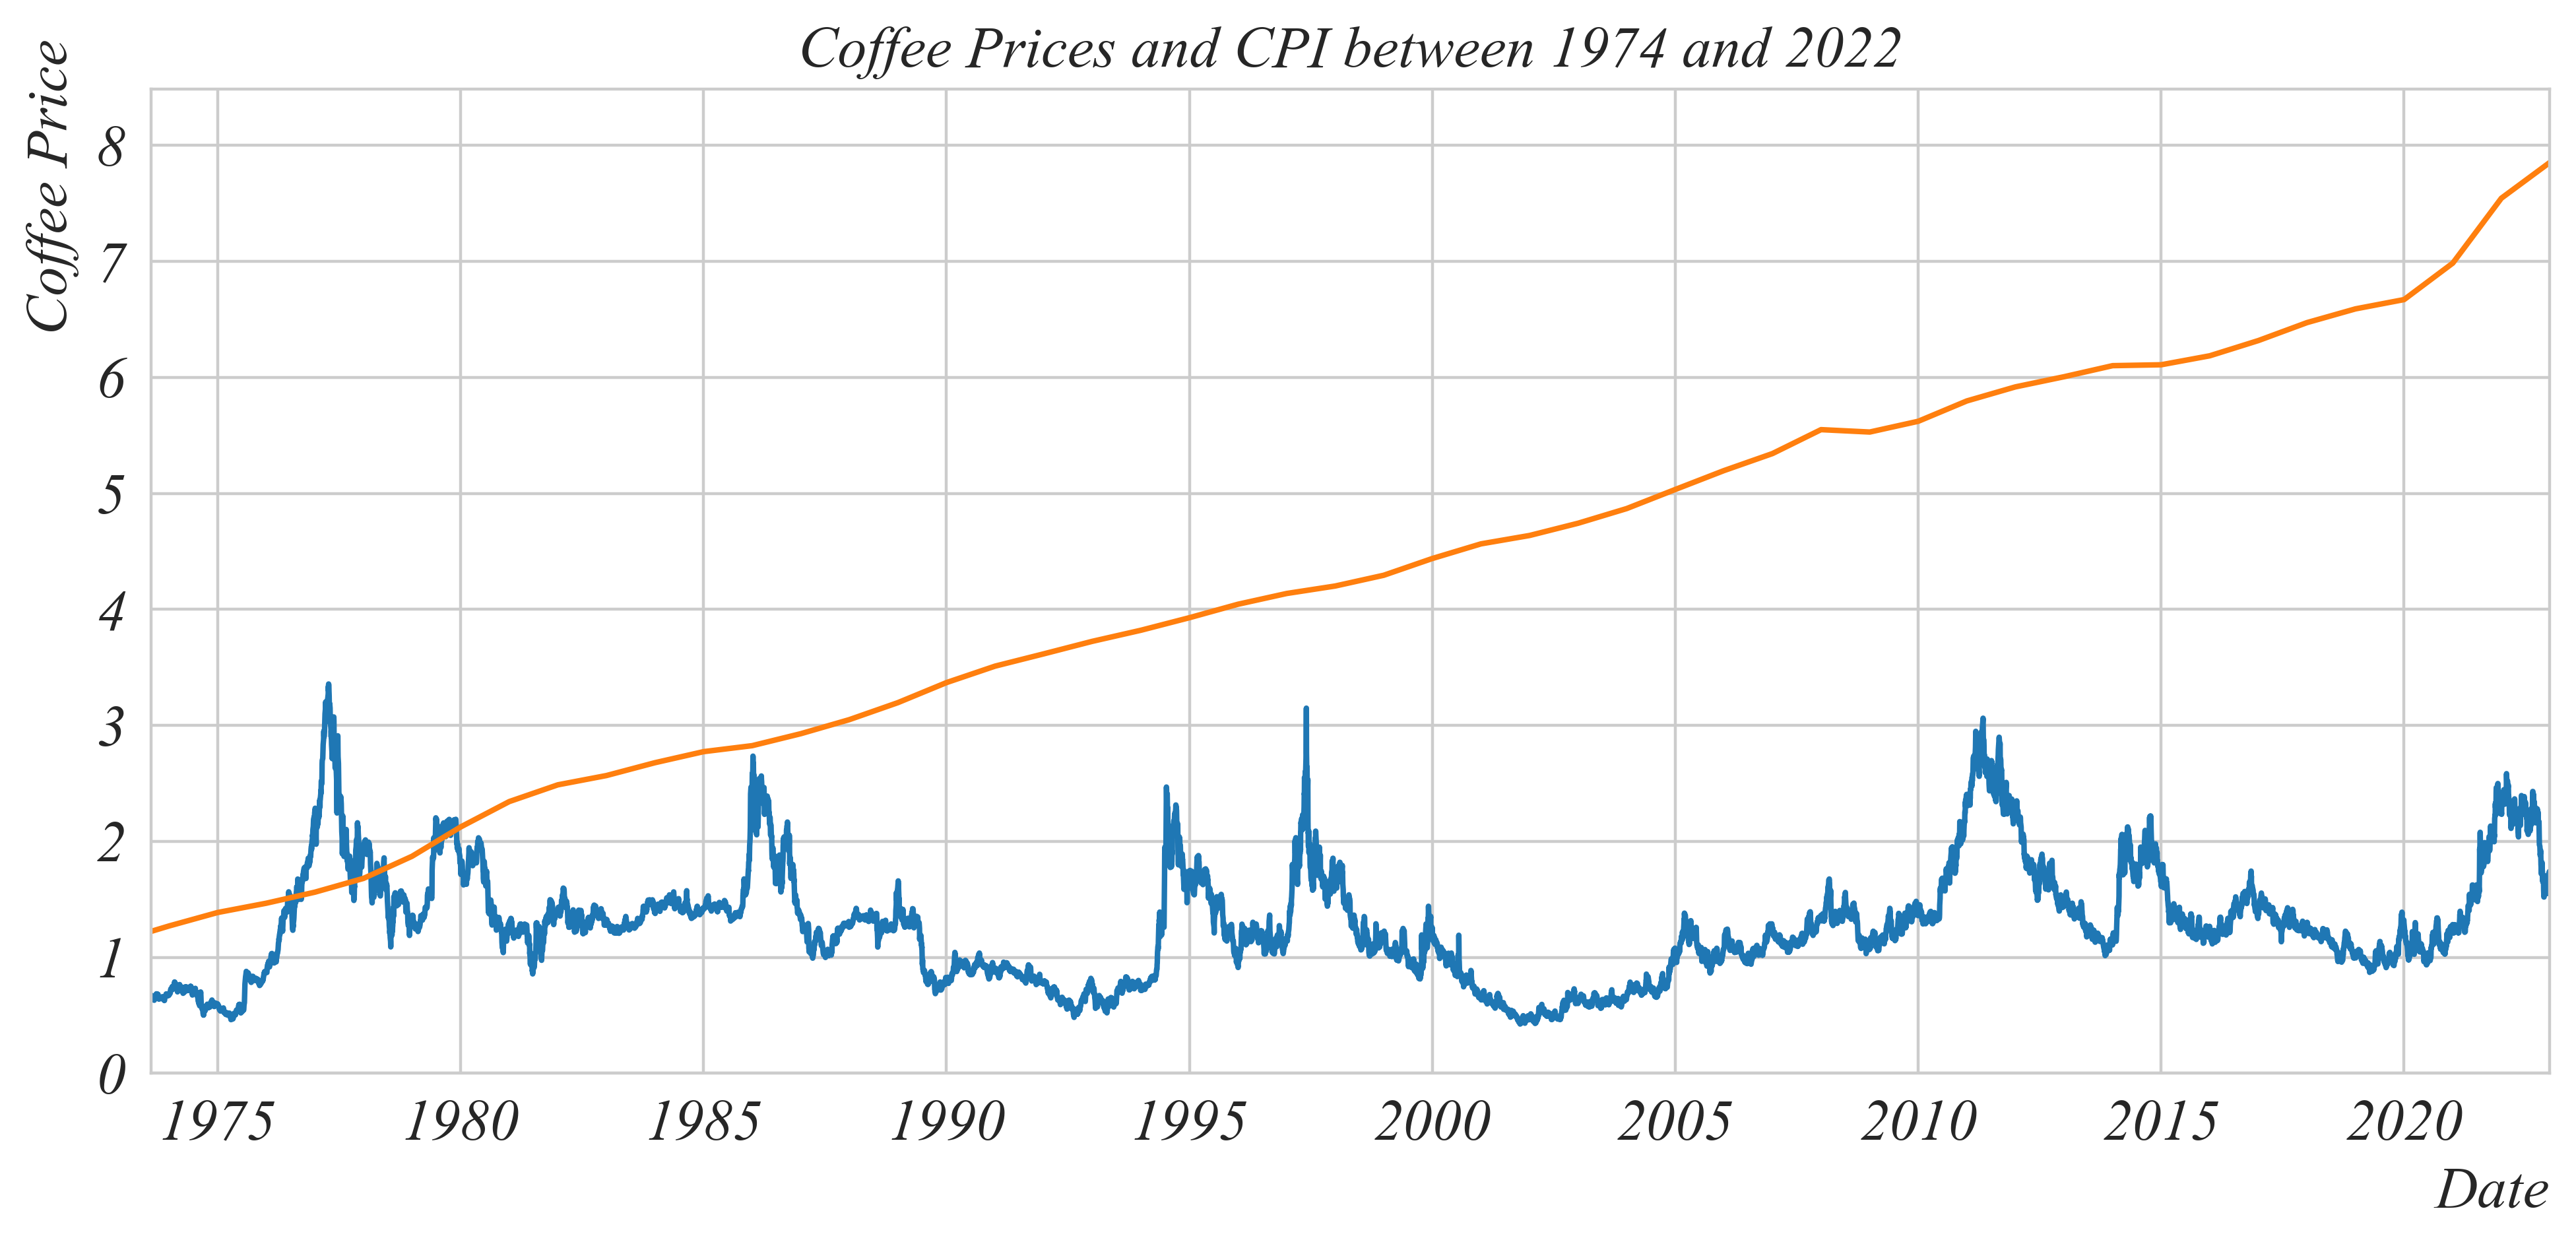

In [212]:
from Weidman_Figures import *
import matplotlib.dates as mdates
    
fig, ax = Weid_Fig(height=5)

data = pd.read_csv('Data/Part_1_8_Coffee_Prices.csv')
data.rename(columns = {' value':'value'}, inplace=True)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[(data['year'] < 2023)]

plt.plot(data['date_column'], data['value'])

cpi = pd.read_csv('Data/Part_1_8_CPI.csv')
cpi['Date'] = pd.to_datetime(cpi['Year'].astype(str) + '-01-01')

plt.plot(cpi['Date'],cpi['base'])

plt.xlabel('Date', loc='right')
ax.set_xlim(data['date_column'].min(), data['date_column'].max())

plt.ylabel('Coffee Price')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.03, .9)
plt.yticks(np.arange(0,8+1,1))
#plt.ylim(1.1,2.6)
plt.title('Coffee Prices and CPI between 1974 and 2022')
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure06.png')


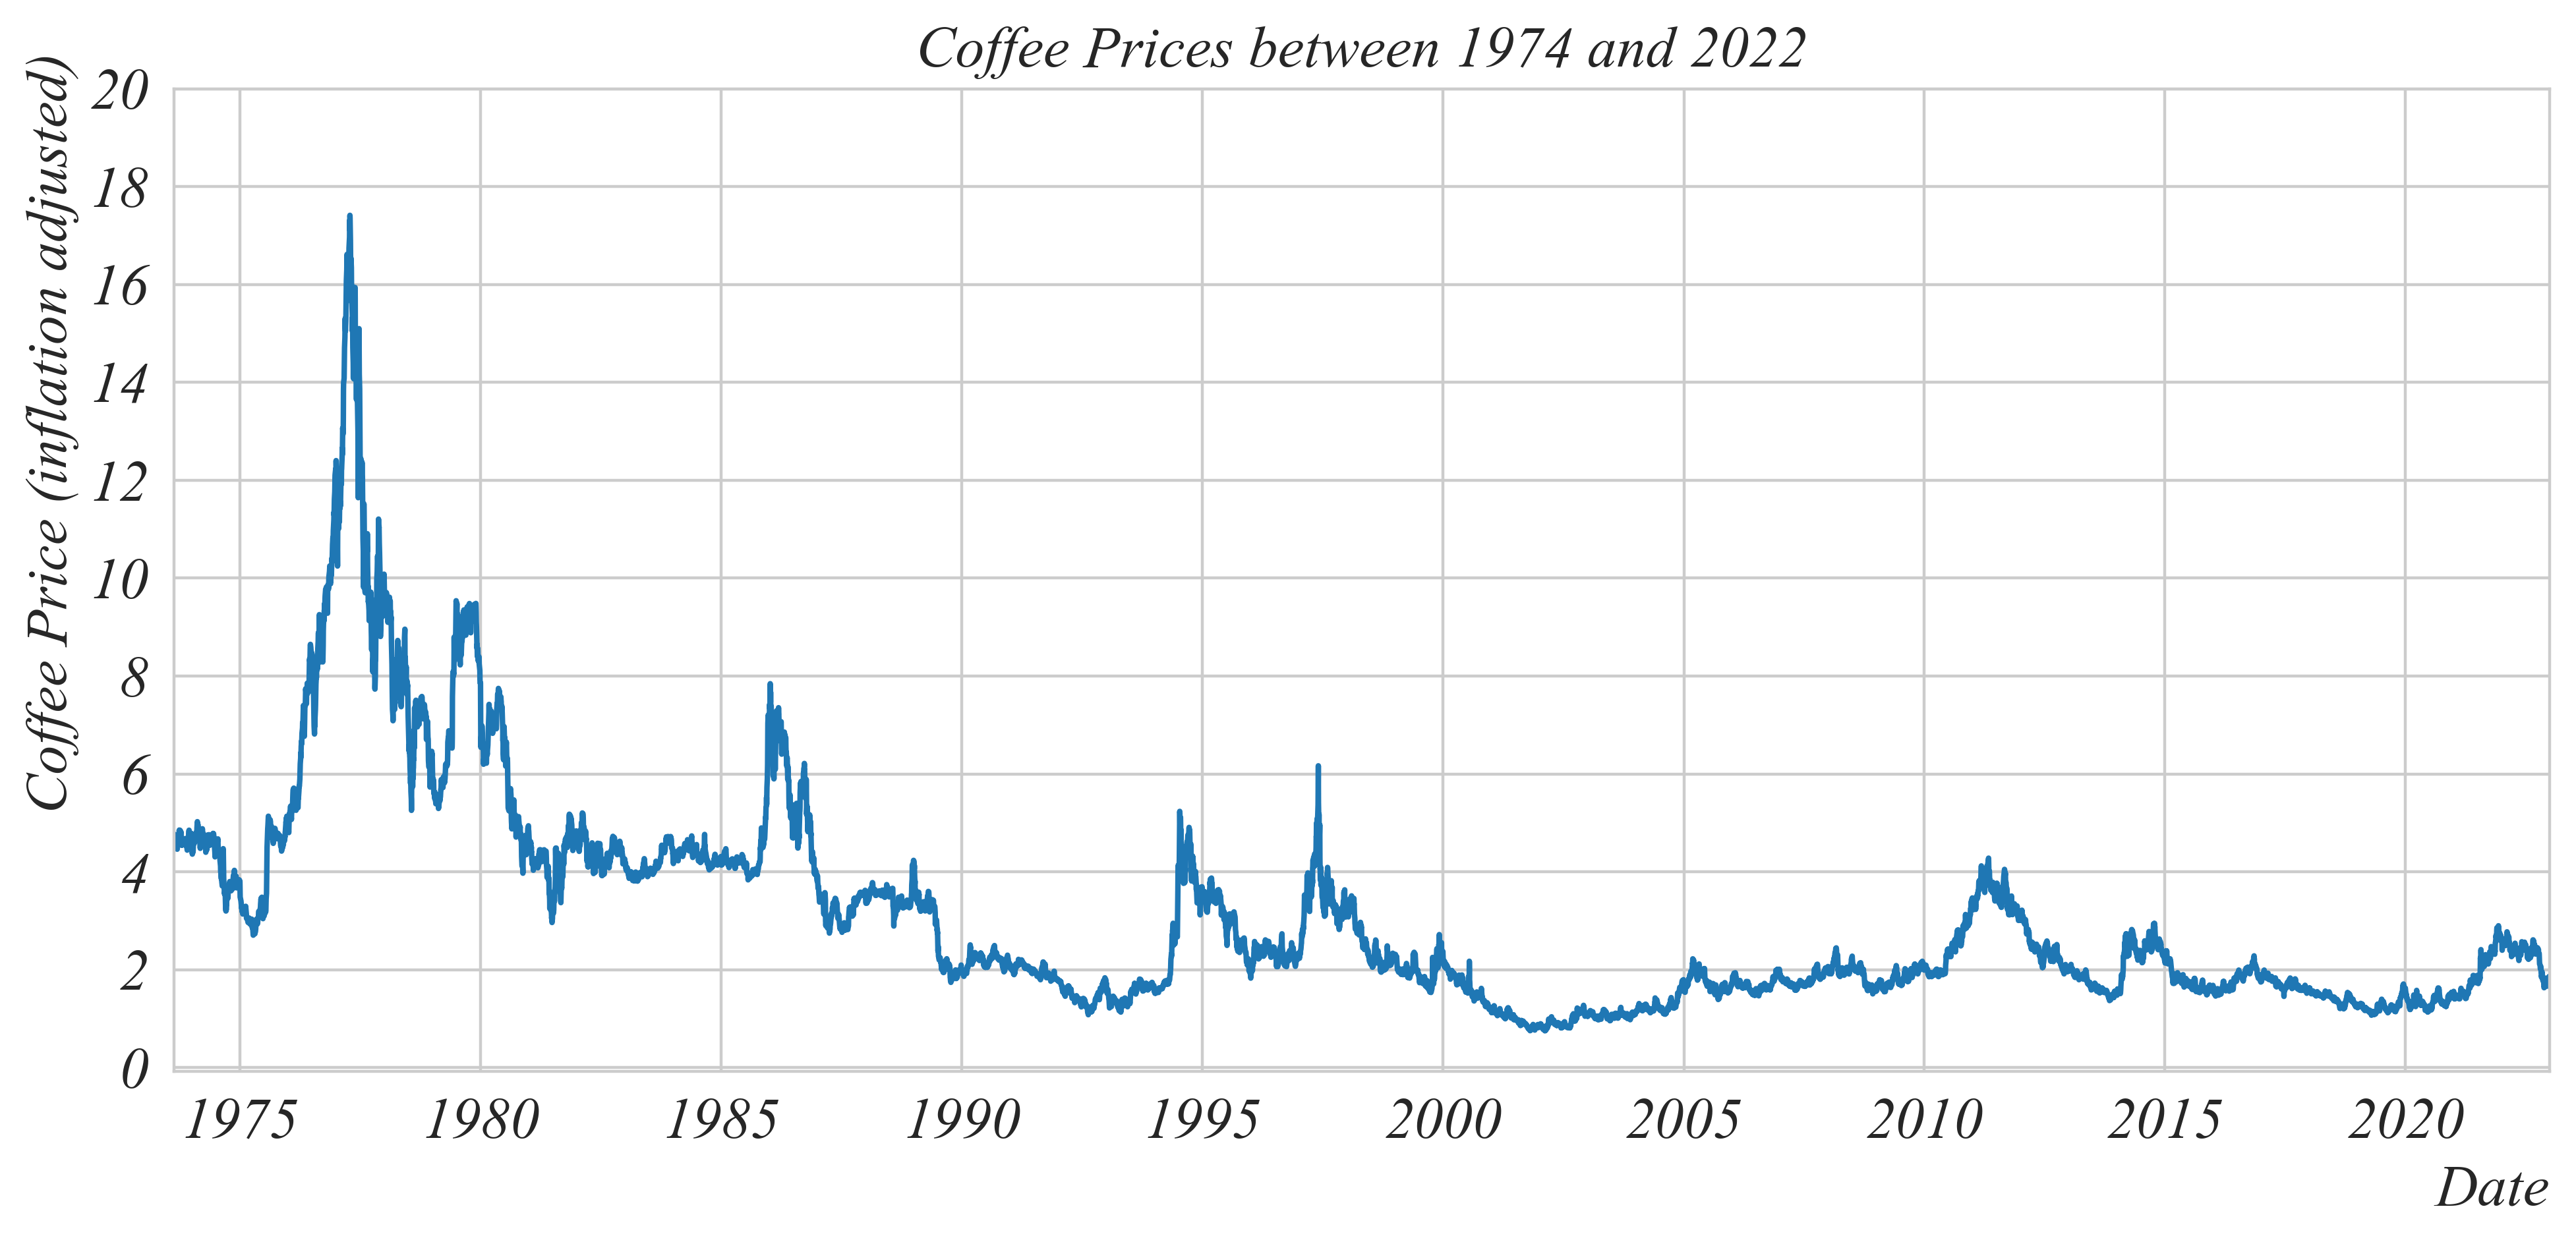

In [213]:
from Weidman_Figures import *
import matplotlib.dates as mdates
    
fig, ax = Weid_Fig(height=5)

data = pd.read_csv('Data/Part_1_8_Coffee_Prices_CPI.csv')
data.rename(columns = {' value':'value'}, inplace=True)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')

plt.plot(data['date_column'], data['value']/data['today'])

plt.xlabel('Date', loc='right')
ax.set_xlim(data['date_column'].min(), data['date_column'].max())

plt.ylabel('Coffee Price (inflation adjusted)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.04, .65)
plt.yticks(np.arange(0,20+1,2))
#plt.ylim(1.1,2.6)
plt.title('Coffee Prices between 1974 and 2022')
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure07.png')


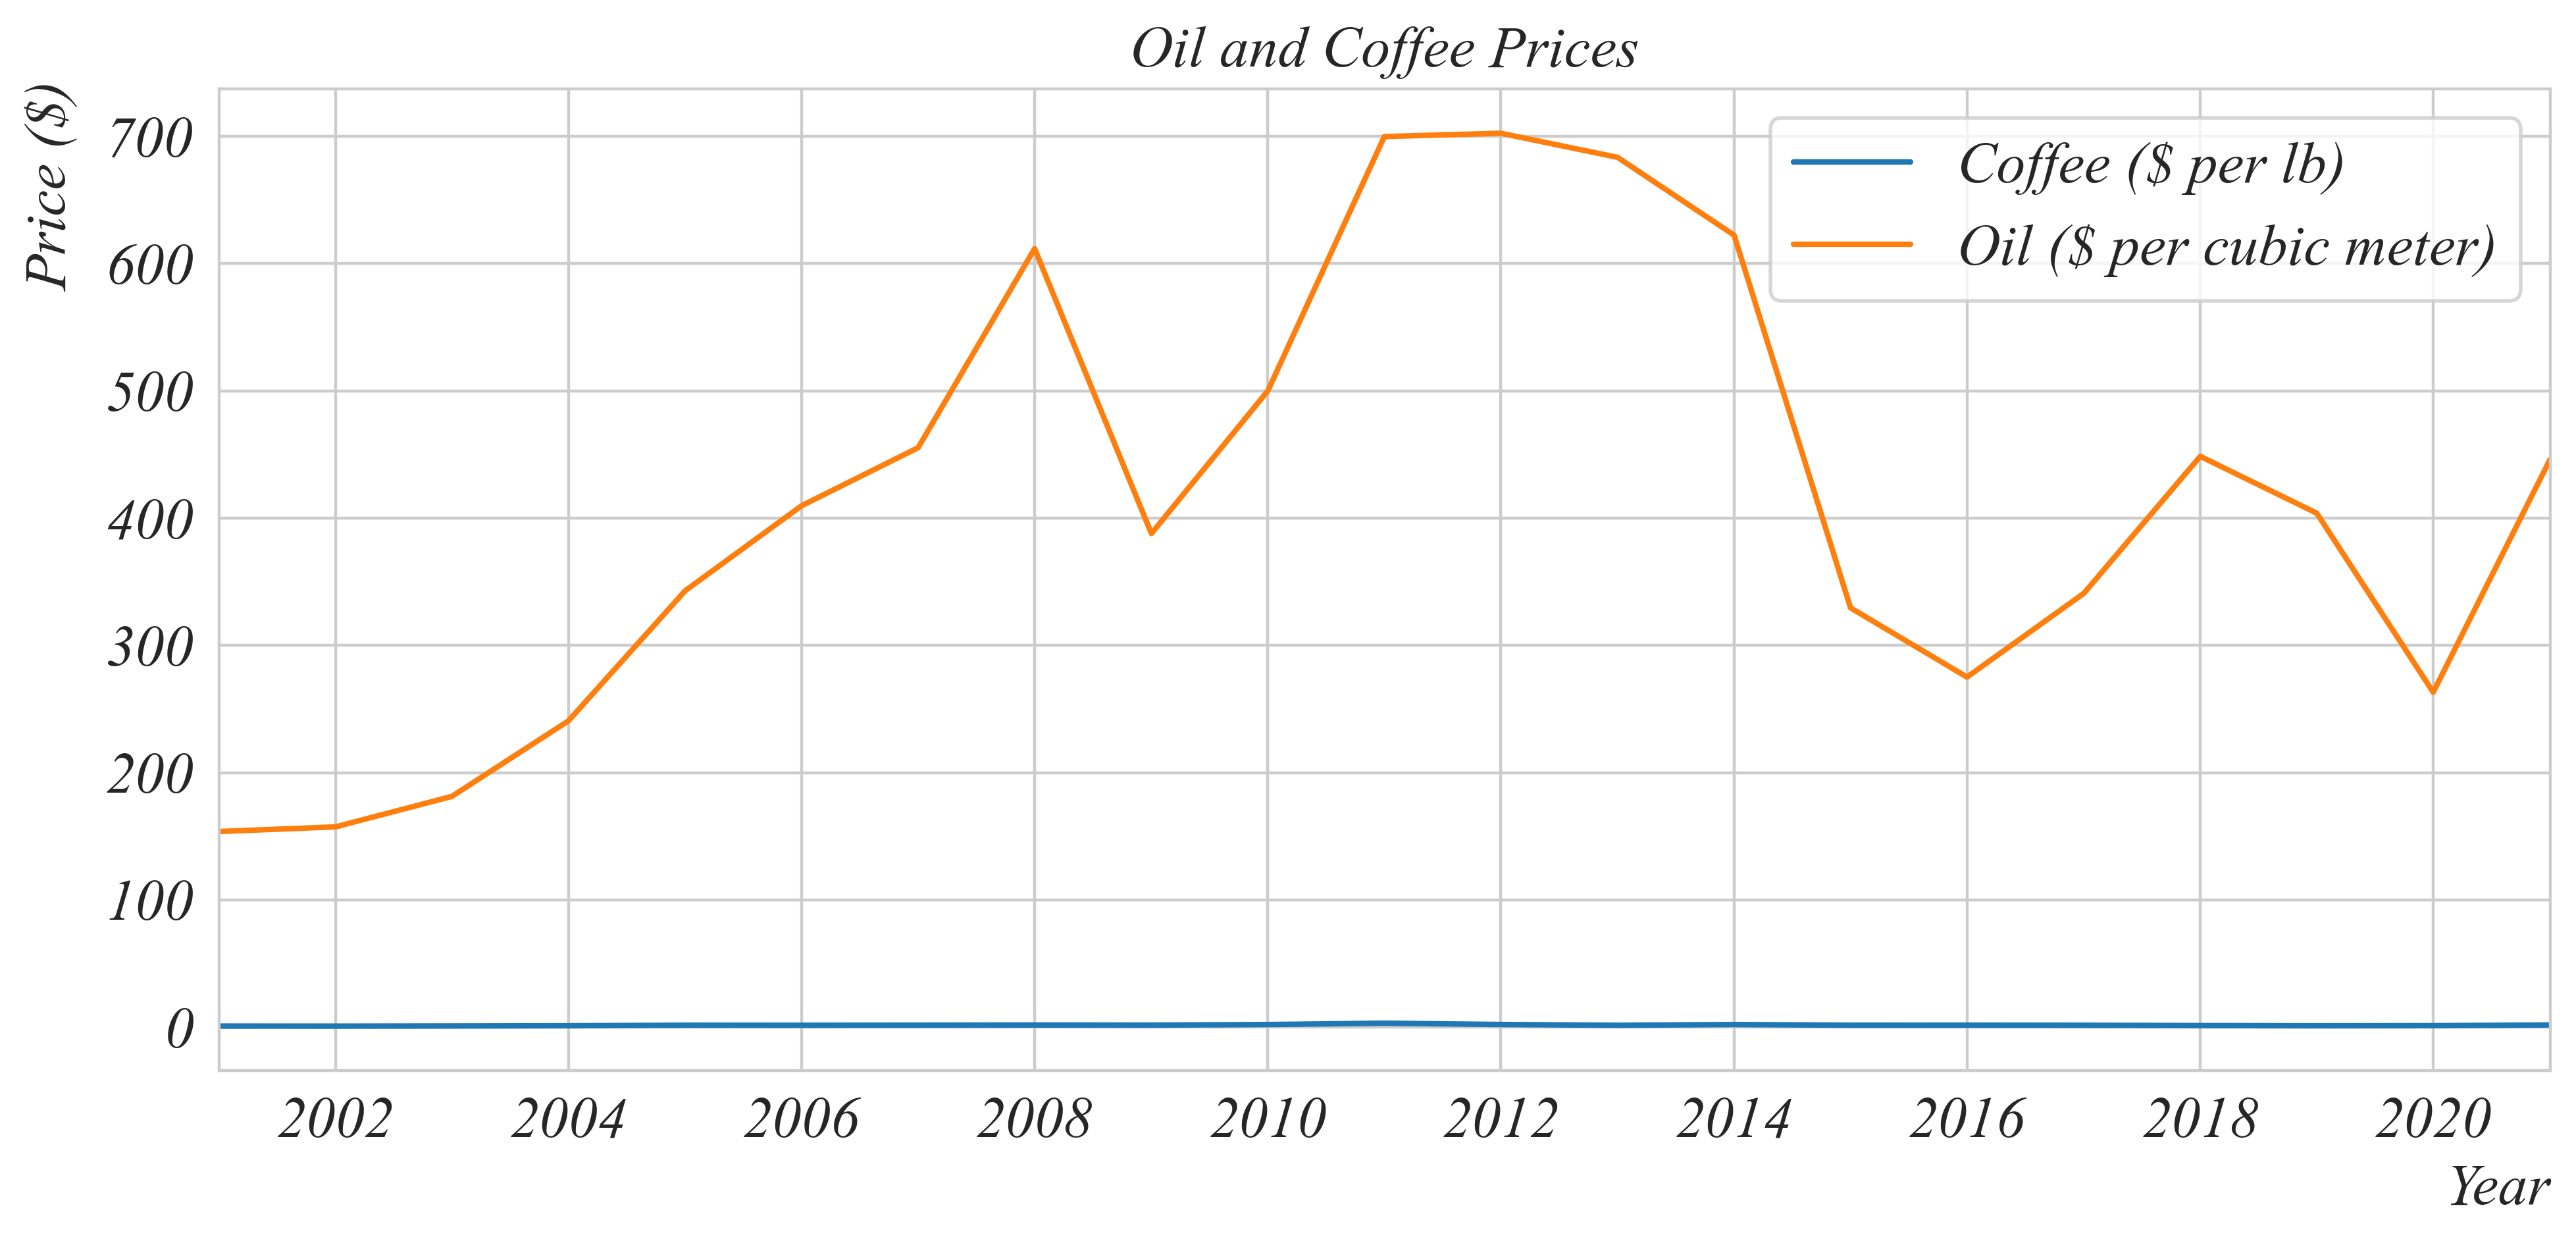

In [2]:
from Weidman_Figures import *
import matplotlib.dates as mdates
    
fig, ax = Weid_Fig(height=5)

data = pd.read_csv('Data/Part_1_8_Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

plt.plot(data['date_column'], data['Coffee'], label='Coffee ($ per lb)')
plt.plot(data['date_column'], data['Oil'], label='Oil ($ per cubic meter)')

plt.xlabel('Year', loc='right')
ax.set_xlim(data['date_column'].min(), data['date_column'].max())
plt.ylabel('Price ($)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06, .9)
plt.title('Oil and Coffee Prices')
plt.legend()
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure08.png')


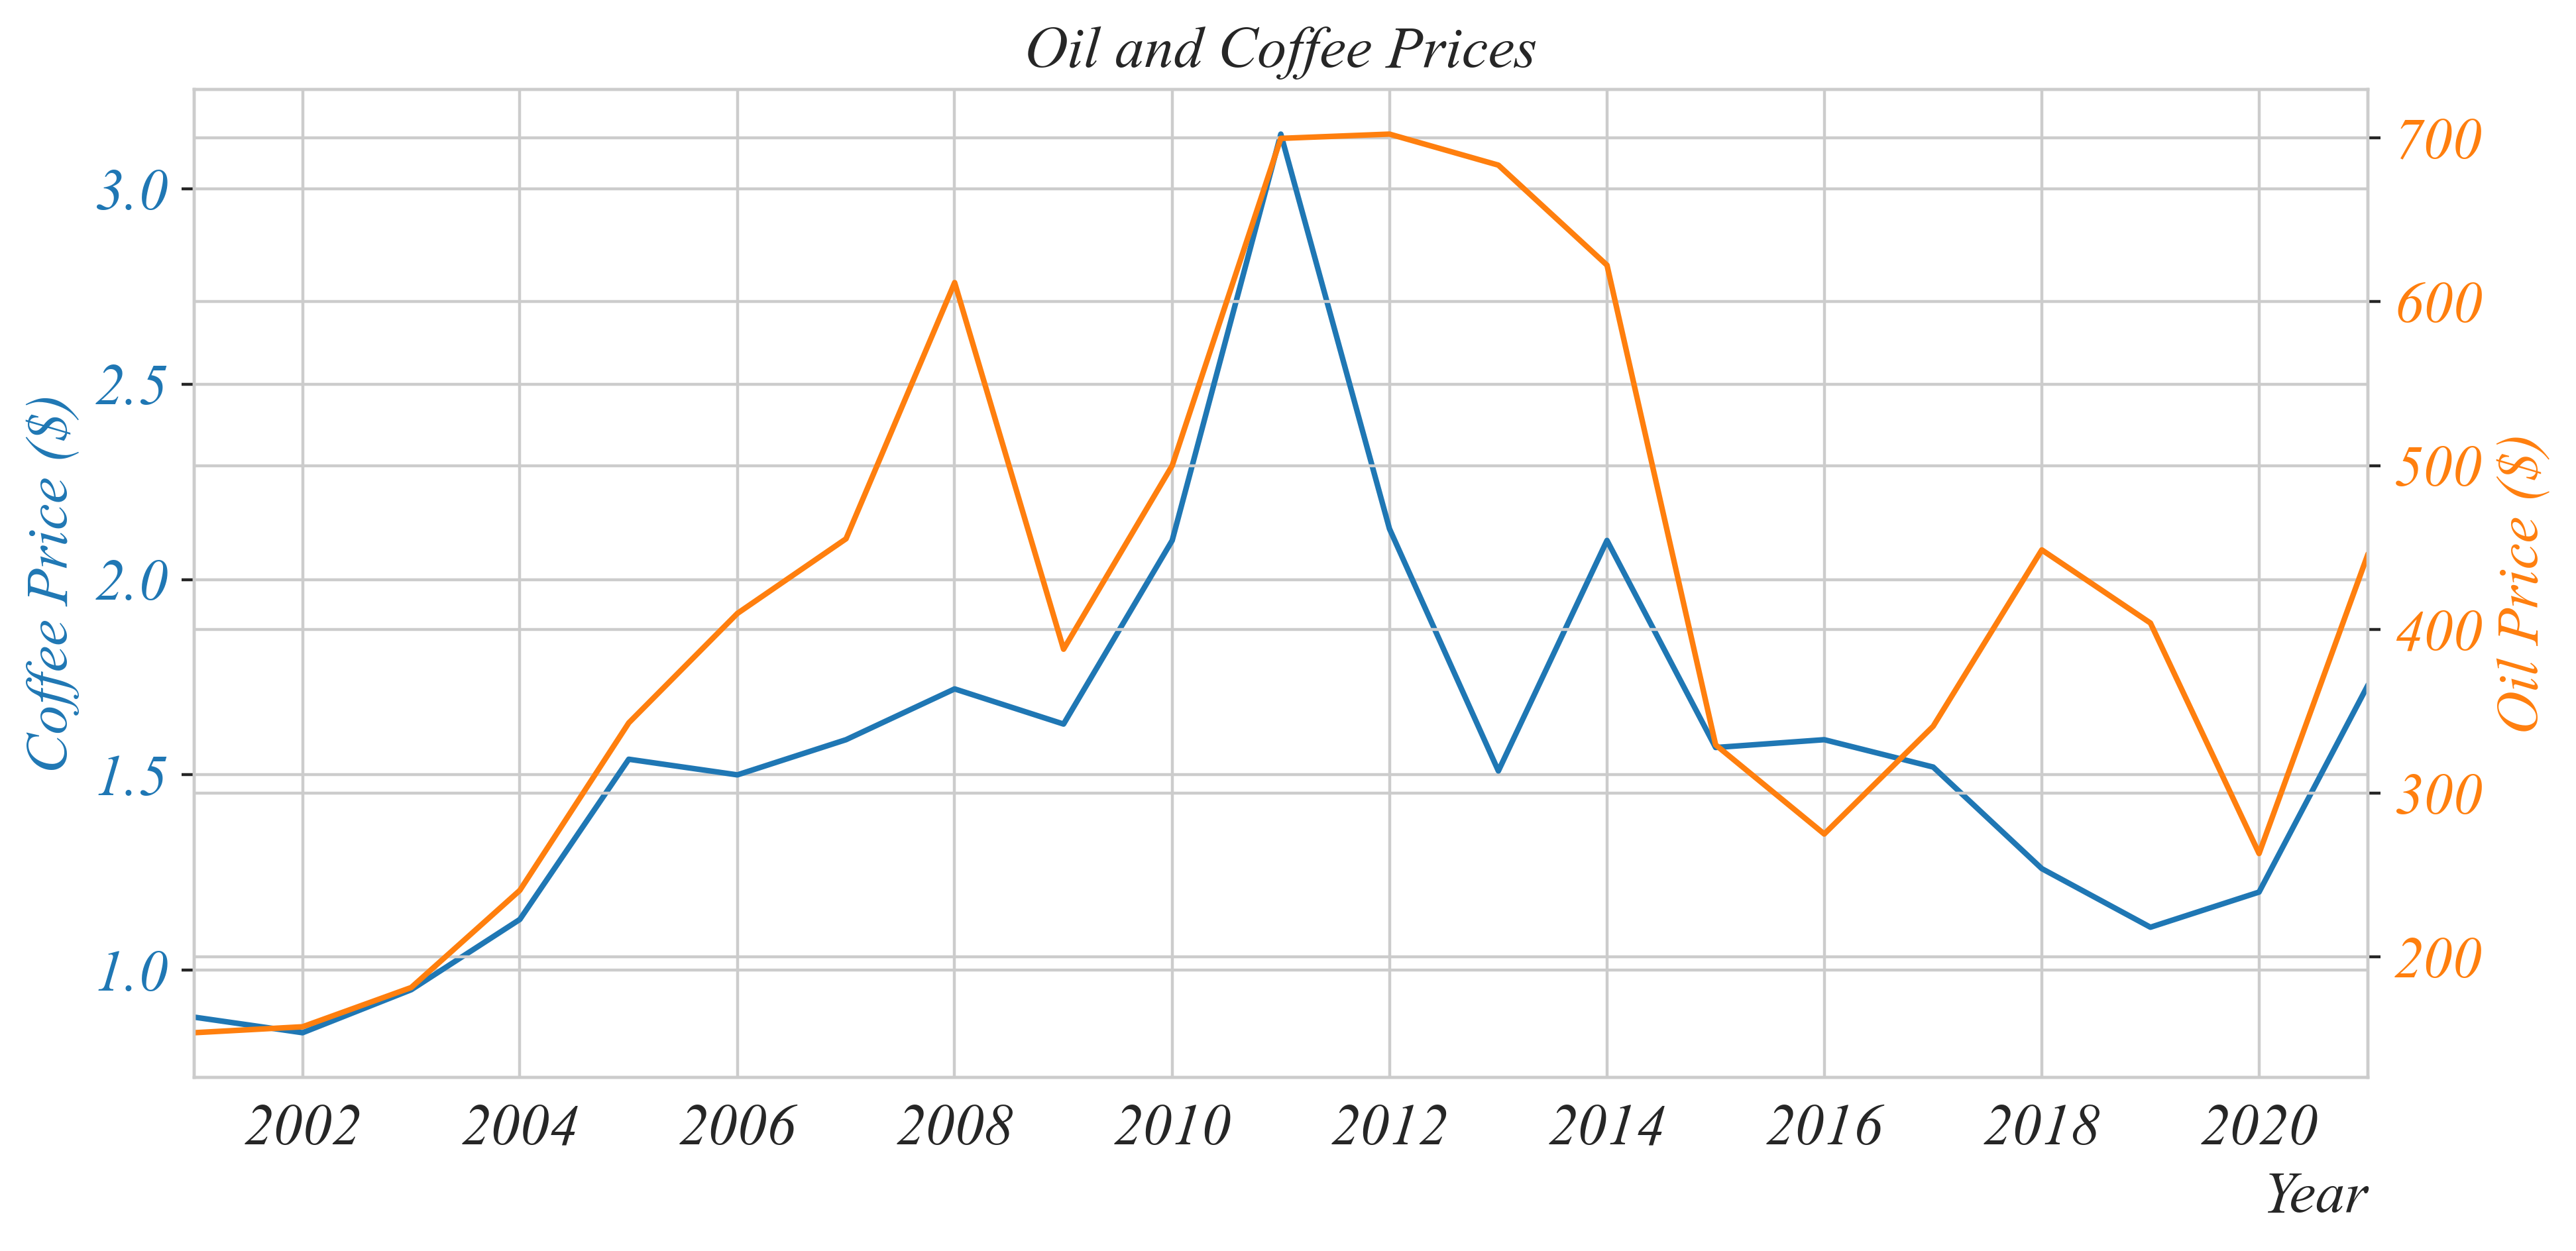

In [3]:
from Weidman_Figures import *
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

# Create the figure and the first axes
fig, ax1 = Weid_Fig(height=5)

# Read the data
data = pd.read_csv('Data/Part_1_8_Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

# Plot Coffee prices on the first y-axis
ax1.plot(data['date_column'], data['Coffee'], label='Coffee ($ per lb)', color='tab:blue')
ax1.set_xlabel('Year', loc='right')
ax1.set_xlim(data['date_column'].min(), data['date_column'].max())
ax1.set_ylabel('Coffee Price ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Oil prices on the second y-axis
ax2.plot(data['date_column'], data['Oil'], label='Oil ($ per cubic meter)', color='tab:orange')
ax2.set_ylabel('Oil Price ($)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add title and legend
plt.title('Oil and Coffee Prices')
fig.tight_layout()  # Adjust layout to prevent overlap

# Save the figure
plt.savefig('Figures/Part_1_8_Figure09.png')


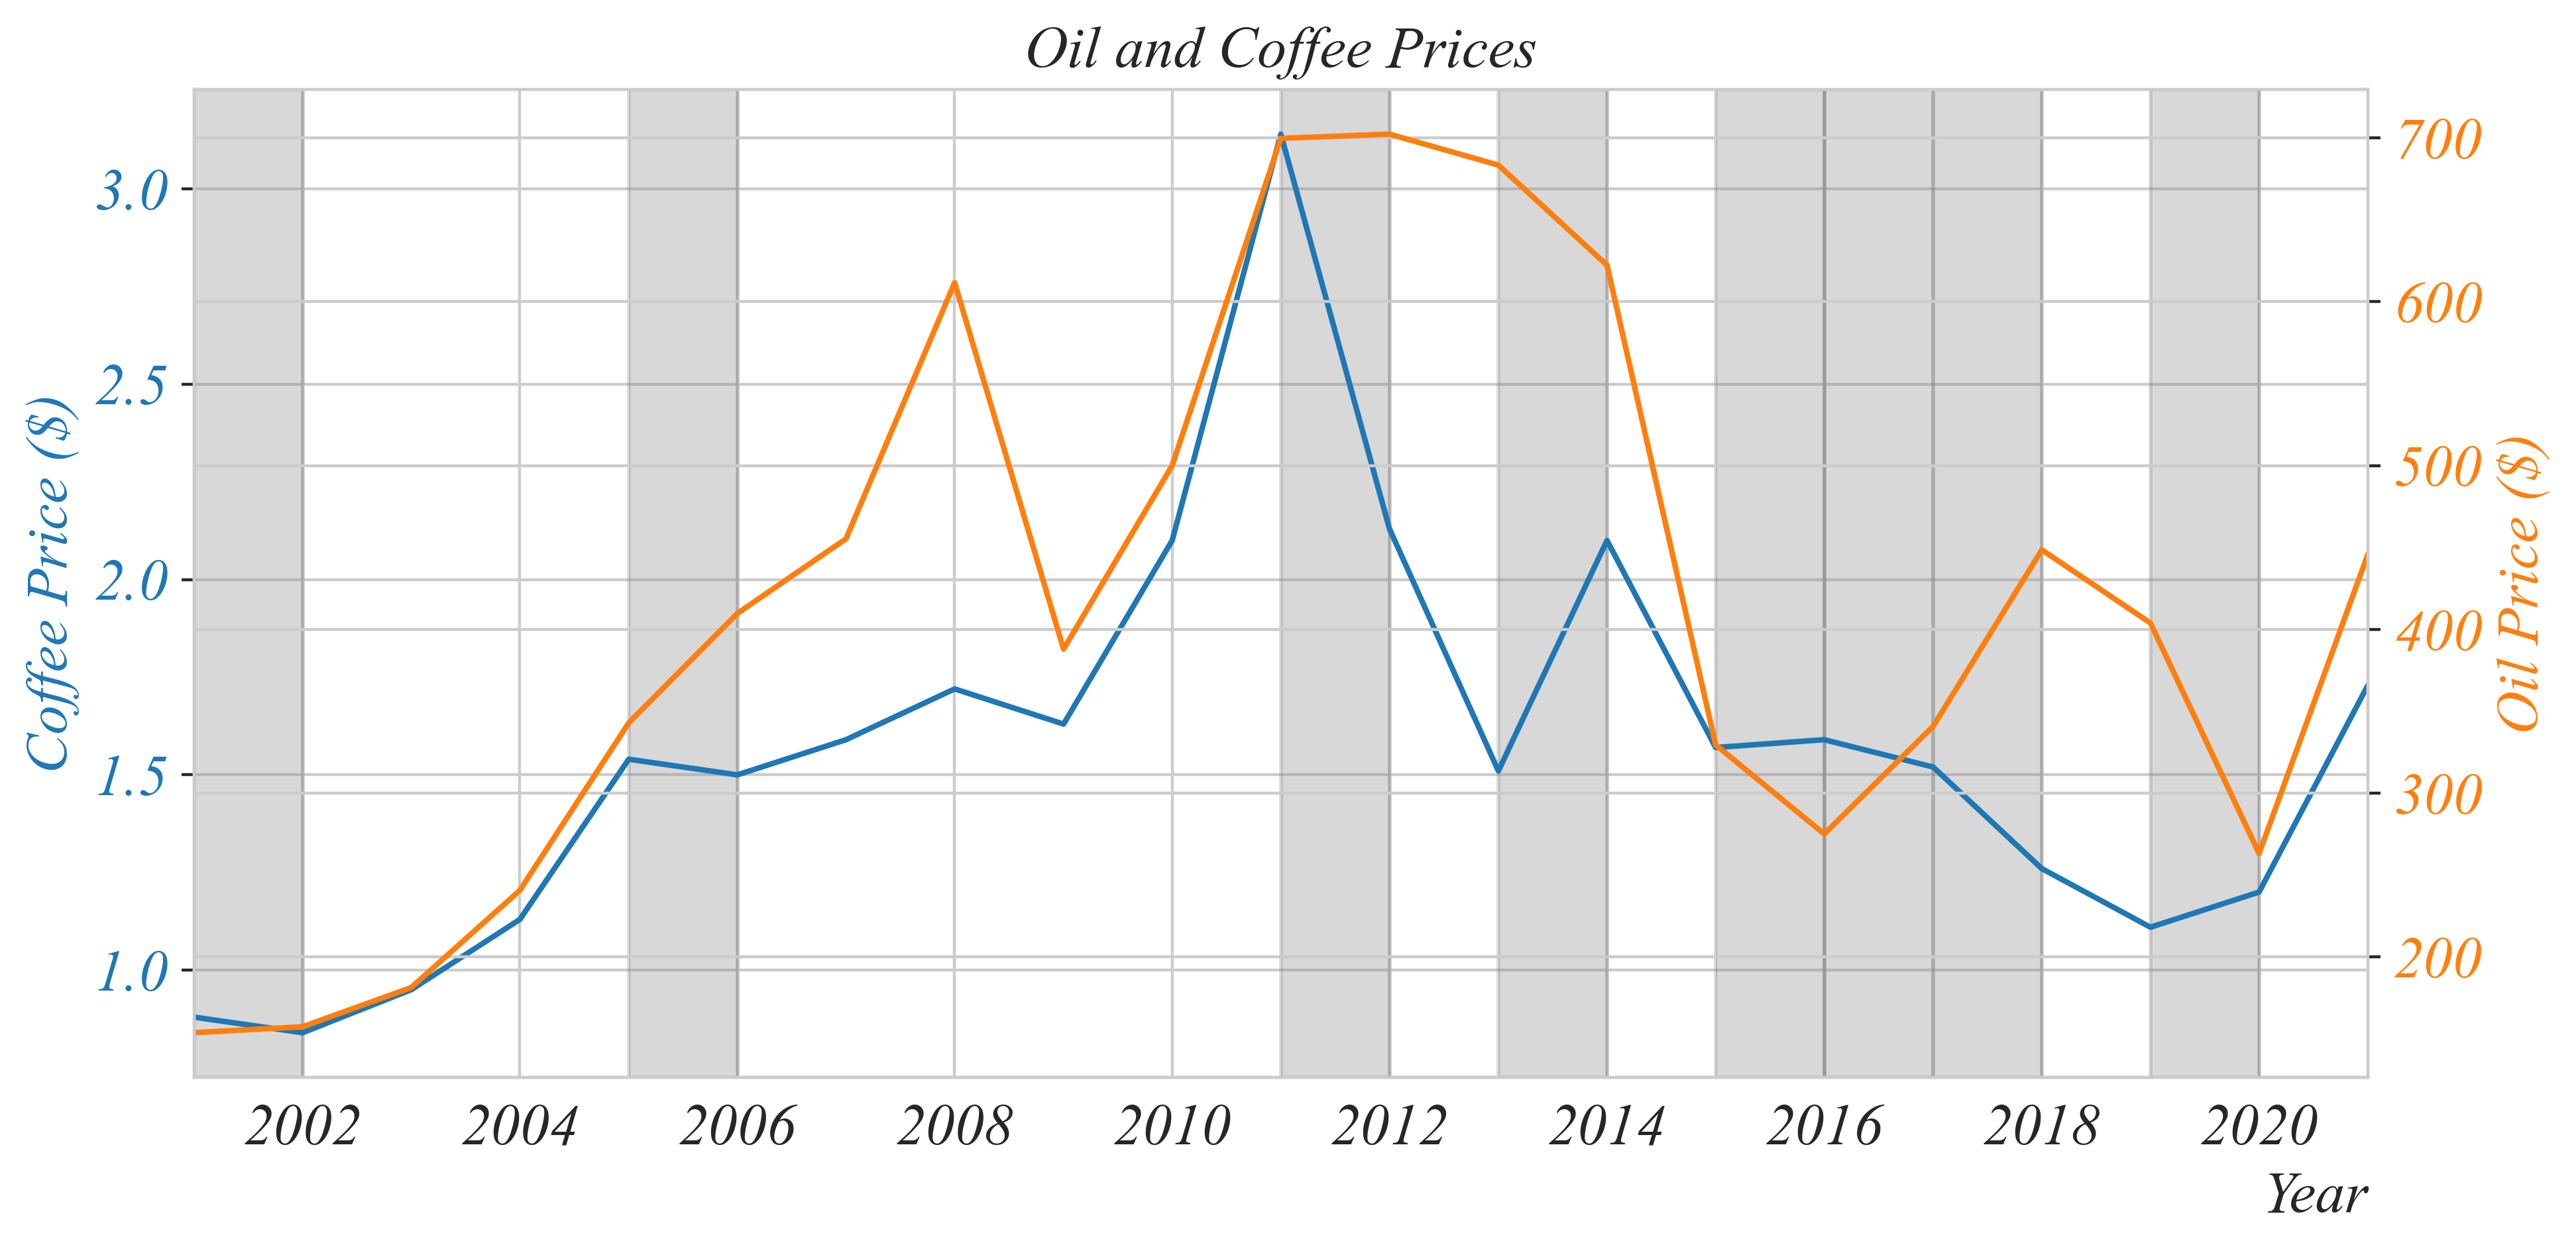

In [5]:
from Weidman_Figures import *
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and the first axes
fig, ax1 = Weid_Fig(height=5)

# Read the data
data = pd.read_csv('Data/Part_1_8_Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

# Plot Coffee prices on the first y-axis
ax1.plot(data['date_column'], data['Coffee'], label='Coffee ($ per lb)', color='tab:blue')
ax1.set_xlabel('Year', loc='right')
ax1.set_xlim(data['date_column'].min(), data['date_column'].max())
ax1.set_ylabel('Coffee Price ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Oil prices on the second y-axis
ax2.plot(data['date_column'], data['Oil'], label='Oil ($ per cubic meter)', color='tab:orange')
ax2.set_ylabel('Oil Price ($)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Determine where both prices increase or decrease together
# Create a mask for where both prices are increasing or decreasing
increasing = (data['Coffee'].diff() < 0) & (data['Oil'].diff() > 0)
decreasing = (data['Coffee'].diff() > 0) & (data['Oil'].diff() < 0)

# Plot grey bars where both prices increase or decrease
for i in range(1, len(data)):
    if increasing[i] or decreasing[i]:
        ax1.axvspan(data['date_column'].iloc[i-1], data['date_column'].iloc[i], color='grey', alpha=0.3)

# Add title and legend
plt.title('Oil and Coffee Prices')
fig.tight_layout()  # Adjust layout to prevent overlap

# Save the figure
plt.savefig('Figures/Part_1_8_Figure10.png')

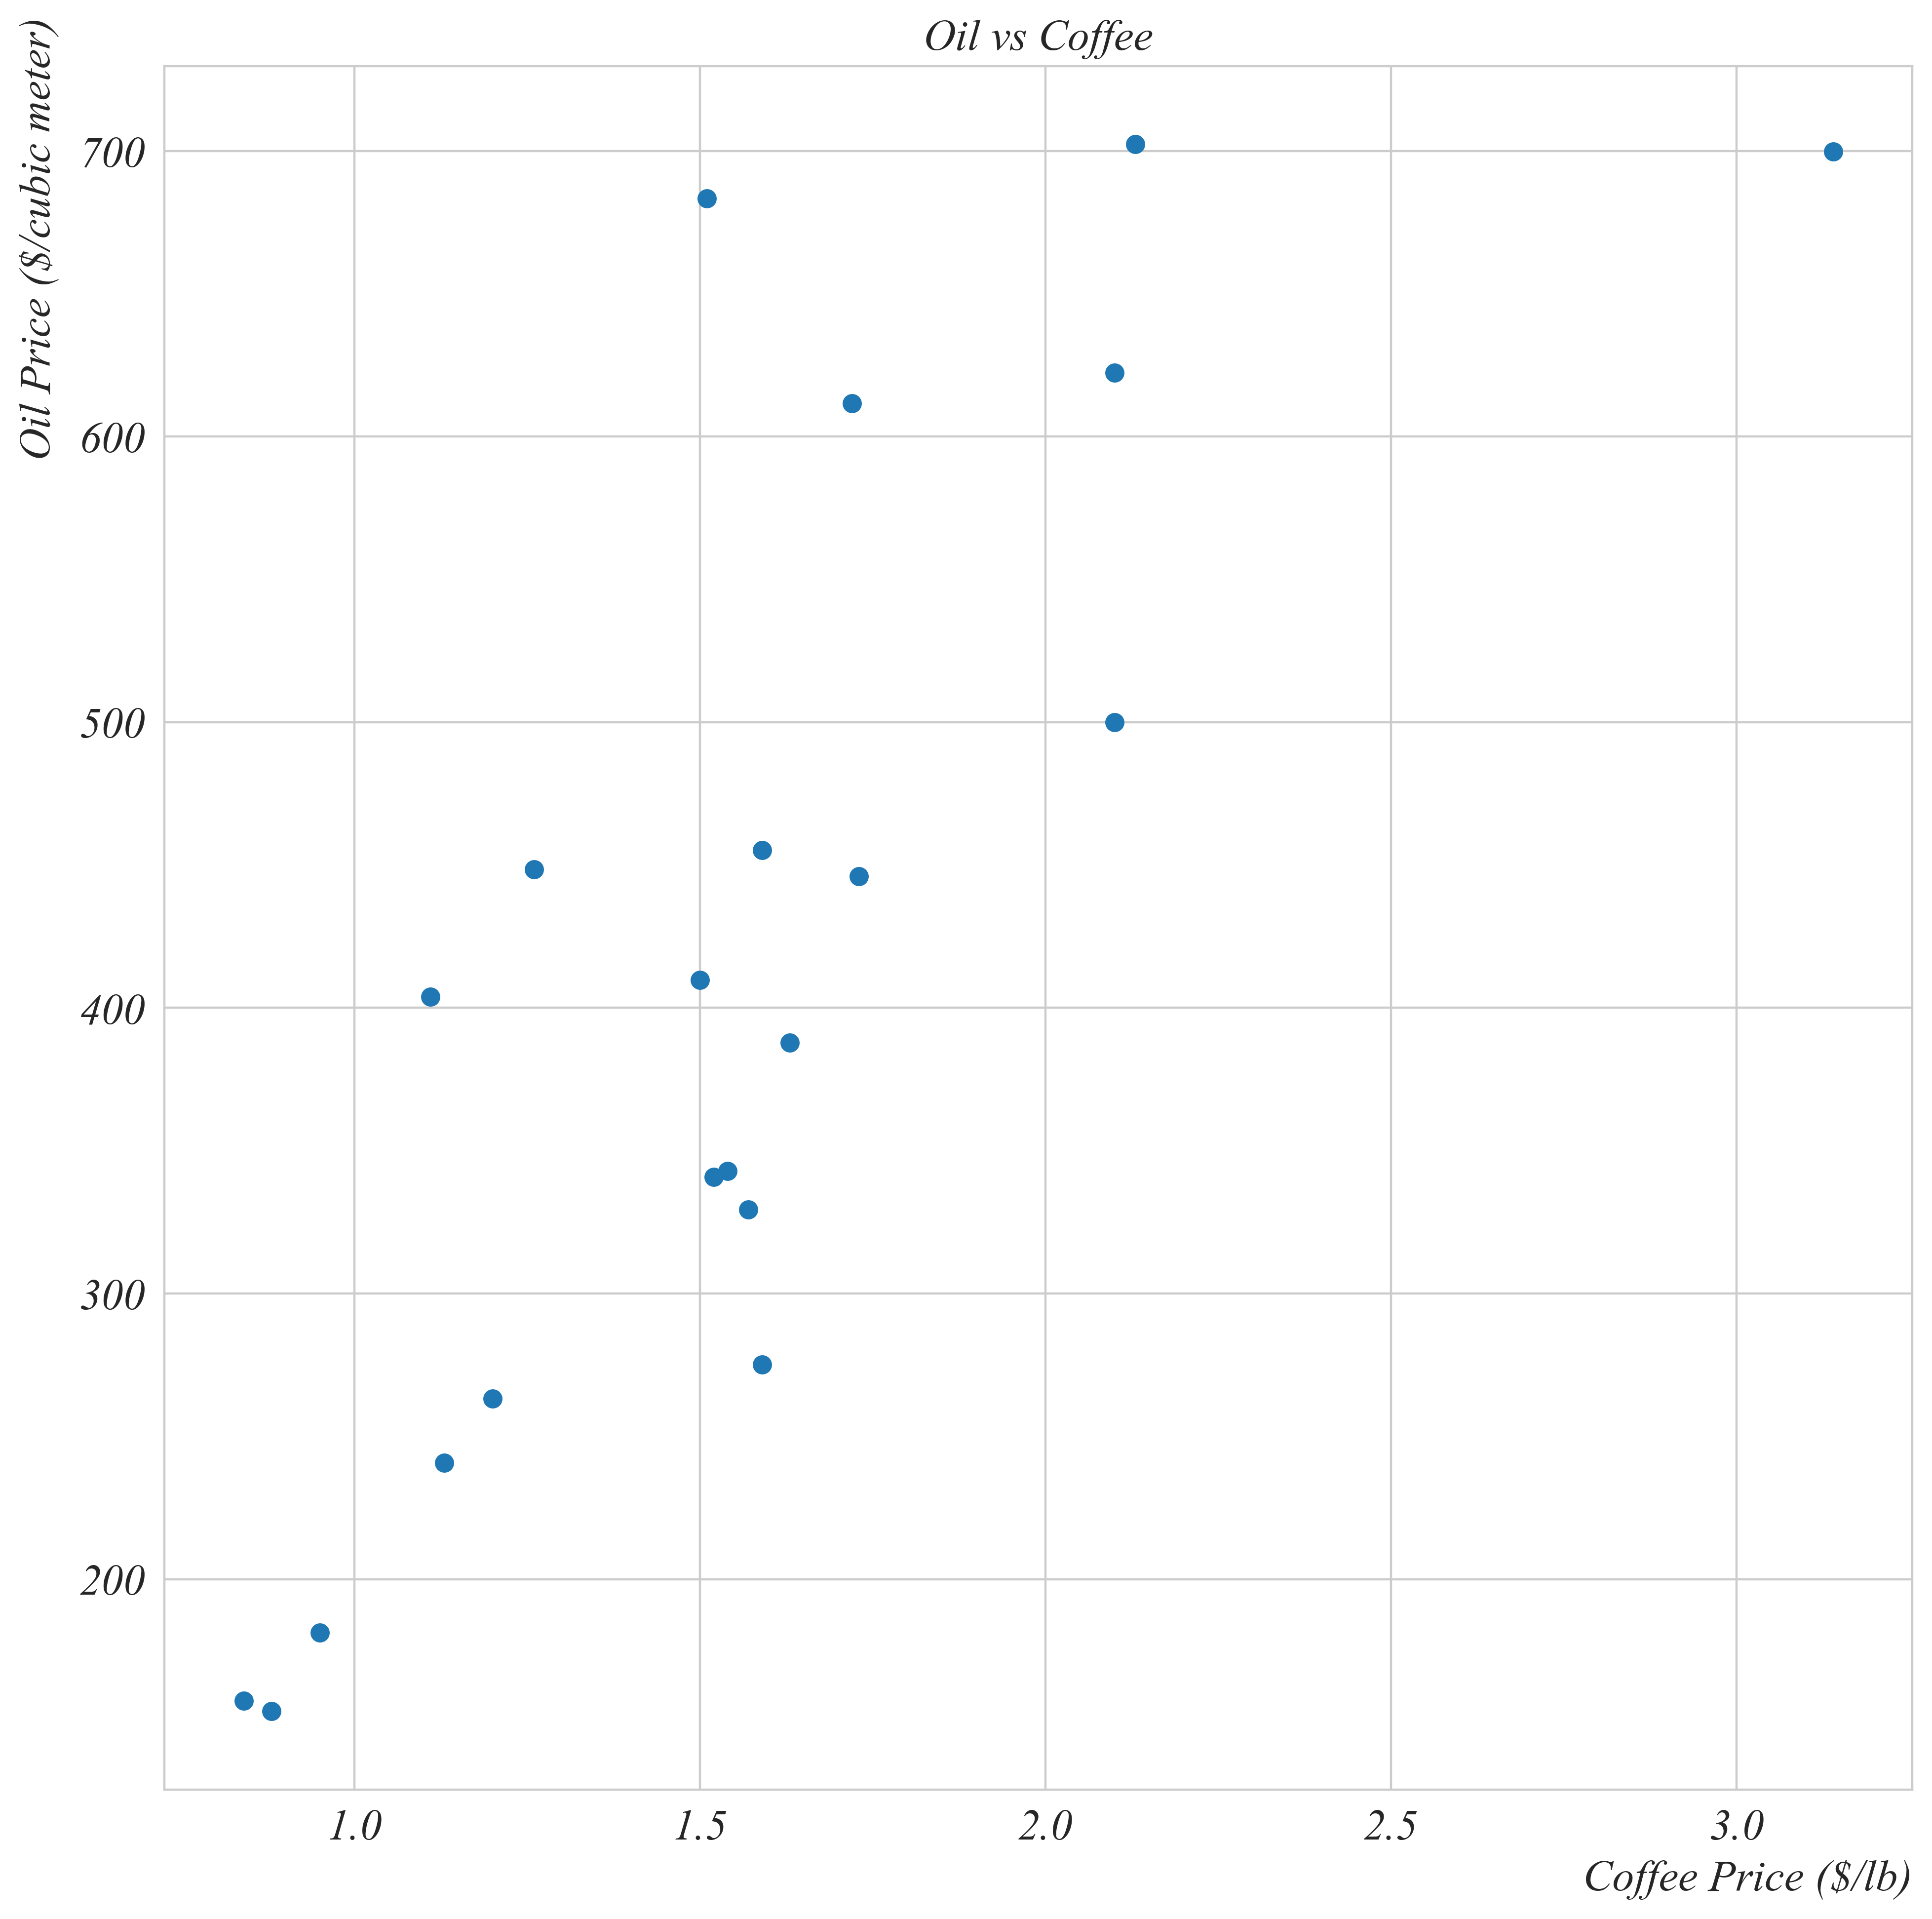

In [10]:
from Weidman_Figures import *
import matplotlib.dates as mdates
    
fig, ax = Weid_Fig(height=10)

data = pd.read_csv('Data/Part_1_8_Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

plt.scatter(data['Coffee'], data['Oil'])

plt.xlabel('Coffee Price ($/lb)', loc='right')
plt.ylabel('Oil Price ($/cubic meter)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06, .9)
plt.title('Oil vs Coffee')
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure11.png')


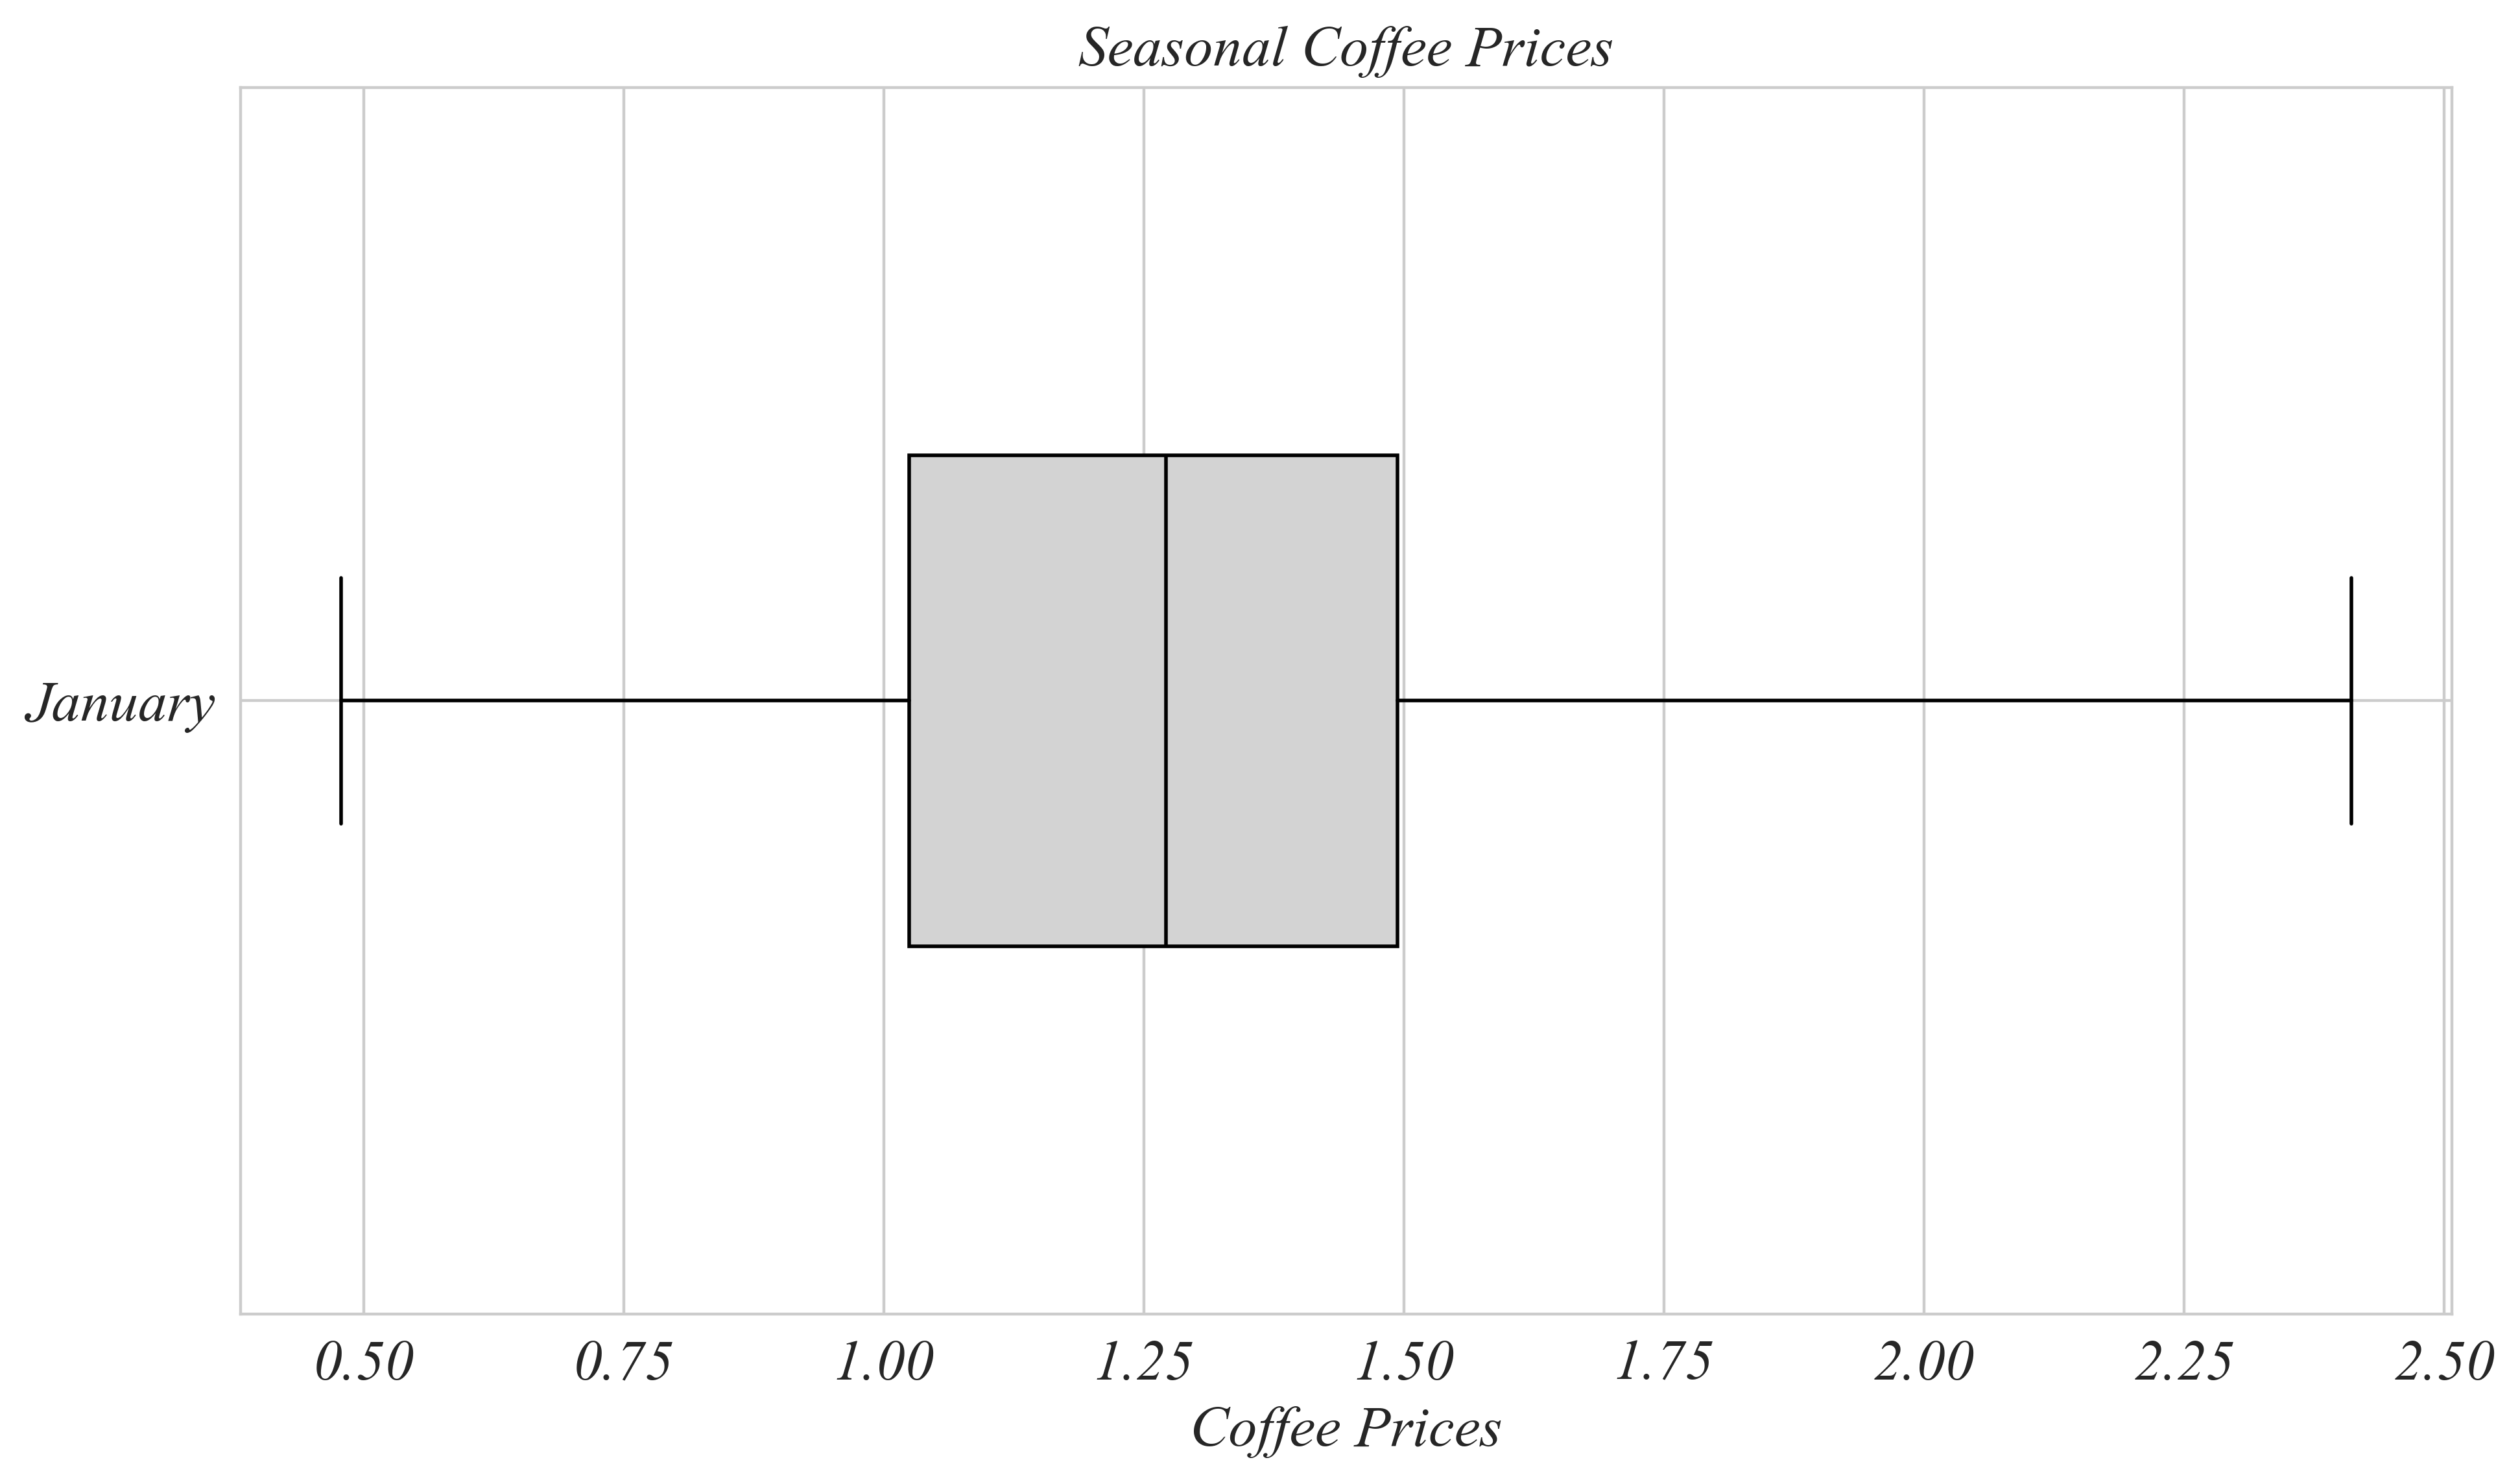

In [56]:
from Weidman_Figures import *
import calendar

fig, ax = Weid_Fig(height=6)

monthly_avg = pd.read_csv('Data/Part_1_8_Monthly_Coffee_Prices.csv', index_col=0)

monthly_avg['month'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)

monthly_avg_sorted = monthly_avg.sort_values('month')
monthly_avg_sorted = monthly_avg_sorted.reset_index(drop=True)
monthly_avg_sorted = monthly_avg_sorted[monthly_avg_sorted.month == 'January']

plt.boxplot(monthly_avg_sorted['price'],
            vert=False,
            widths=0.4,
            whis=(0, 100),
            patch_artist=True,  # Enable patch artist mode
            boxprops=dict(facecolor='lightgrey', color='black'),  # Set the facecolor of the box
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markerfacecolor='black', marker='o', markersize=5, linestyle='none'))

plt.title('Seasonal Coffee Prices')
plt.xlabel('Coffee Prices')
plt.ylabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
plt.yticks([1], ['January'])  
plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure12.png')

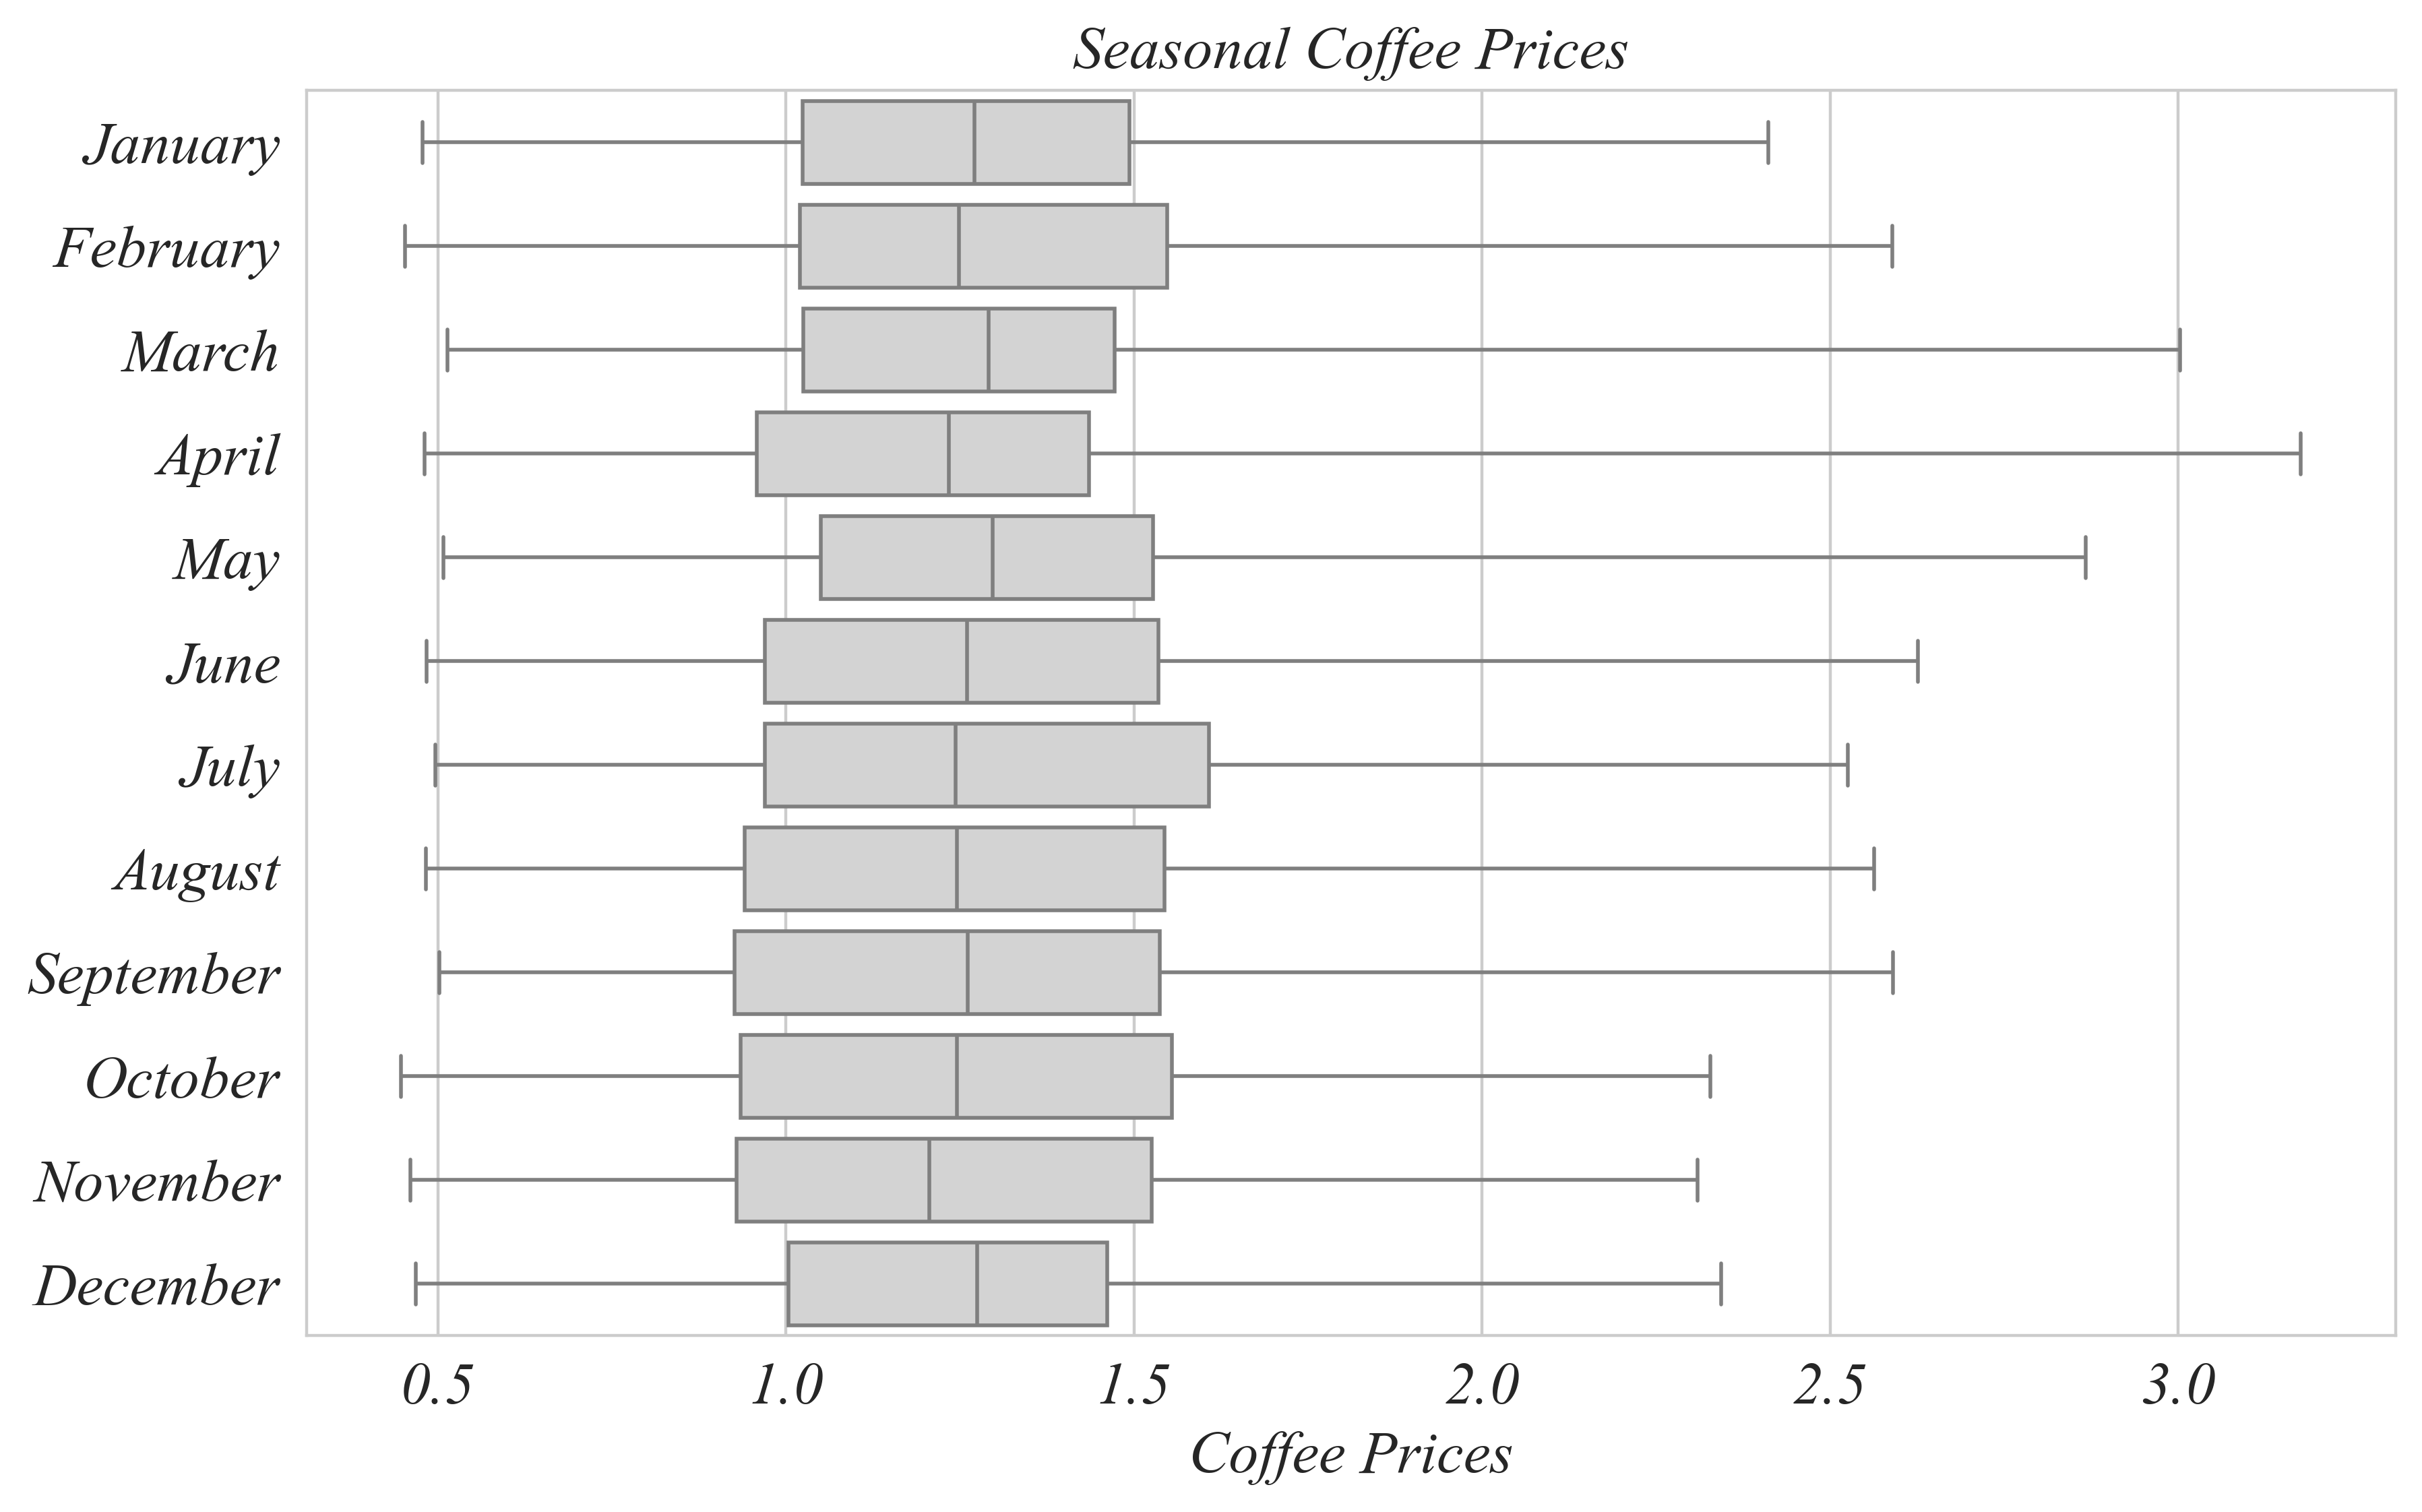

In [57]:
from Weidman_Figures import *
import calendar

fig, ax = Weid_Fig(height=6)

monthly_avg = pd.read_csv('Data/Part_1_8_Monthly_Coffee_Prices.csv', index_col=0)
monthly_avg['month'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)

monthly_avg_sorted = monthly_avg.sort_values('month')
monthly_avg_sorted = monthly_avg_sorted.reset_index(drop=True)

sns.boxplot(x='price', y='month', color='lightgrey', data=monthly_avg_sorted, whis=(0, 100), zorder=2, vert=False)

plt.title('Seasonal Coffee Prices')
plt.xlabel('Coffee Prices')
plt.ylabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
#plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure13.png')

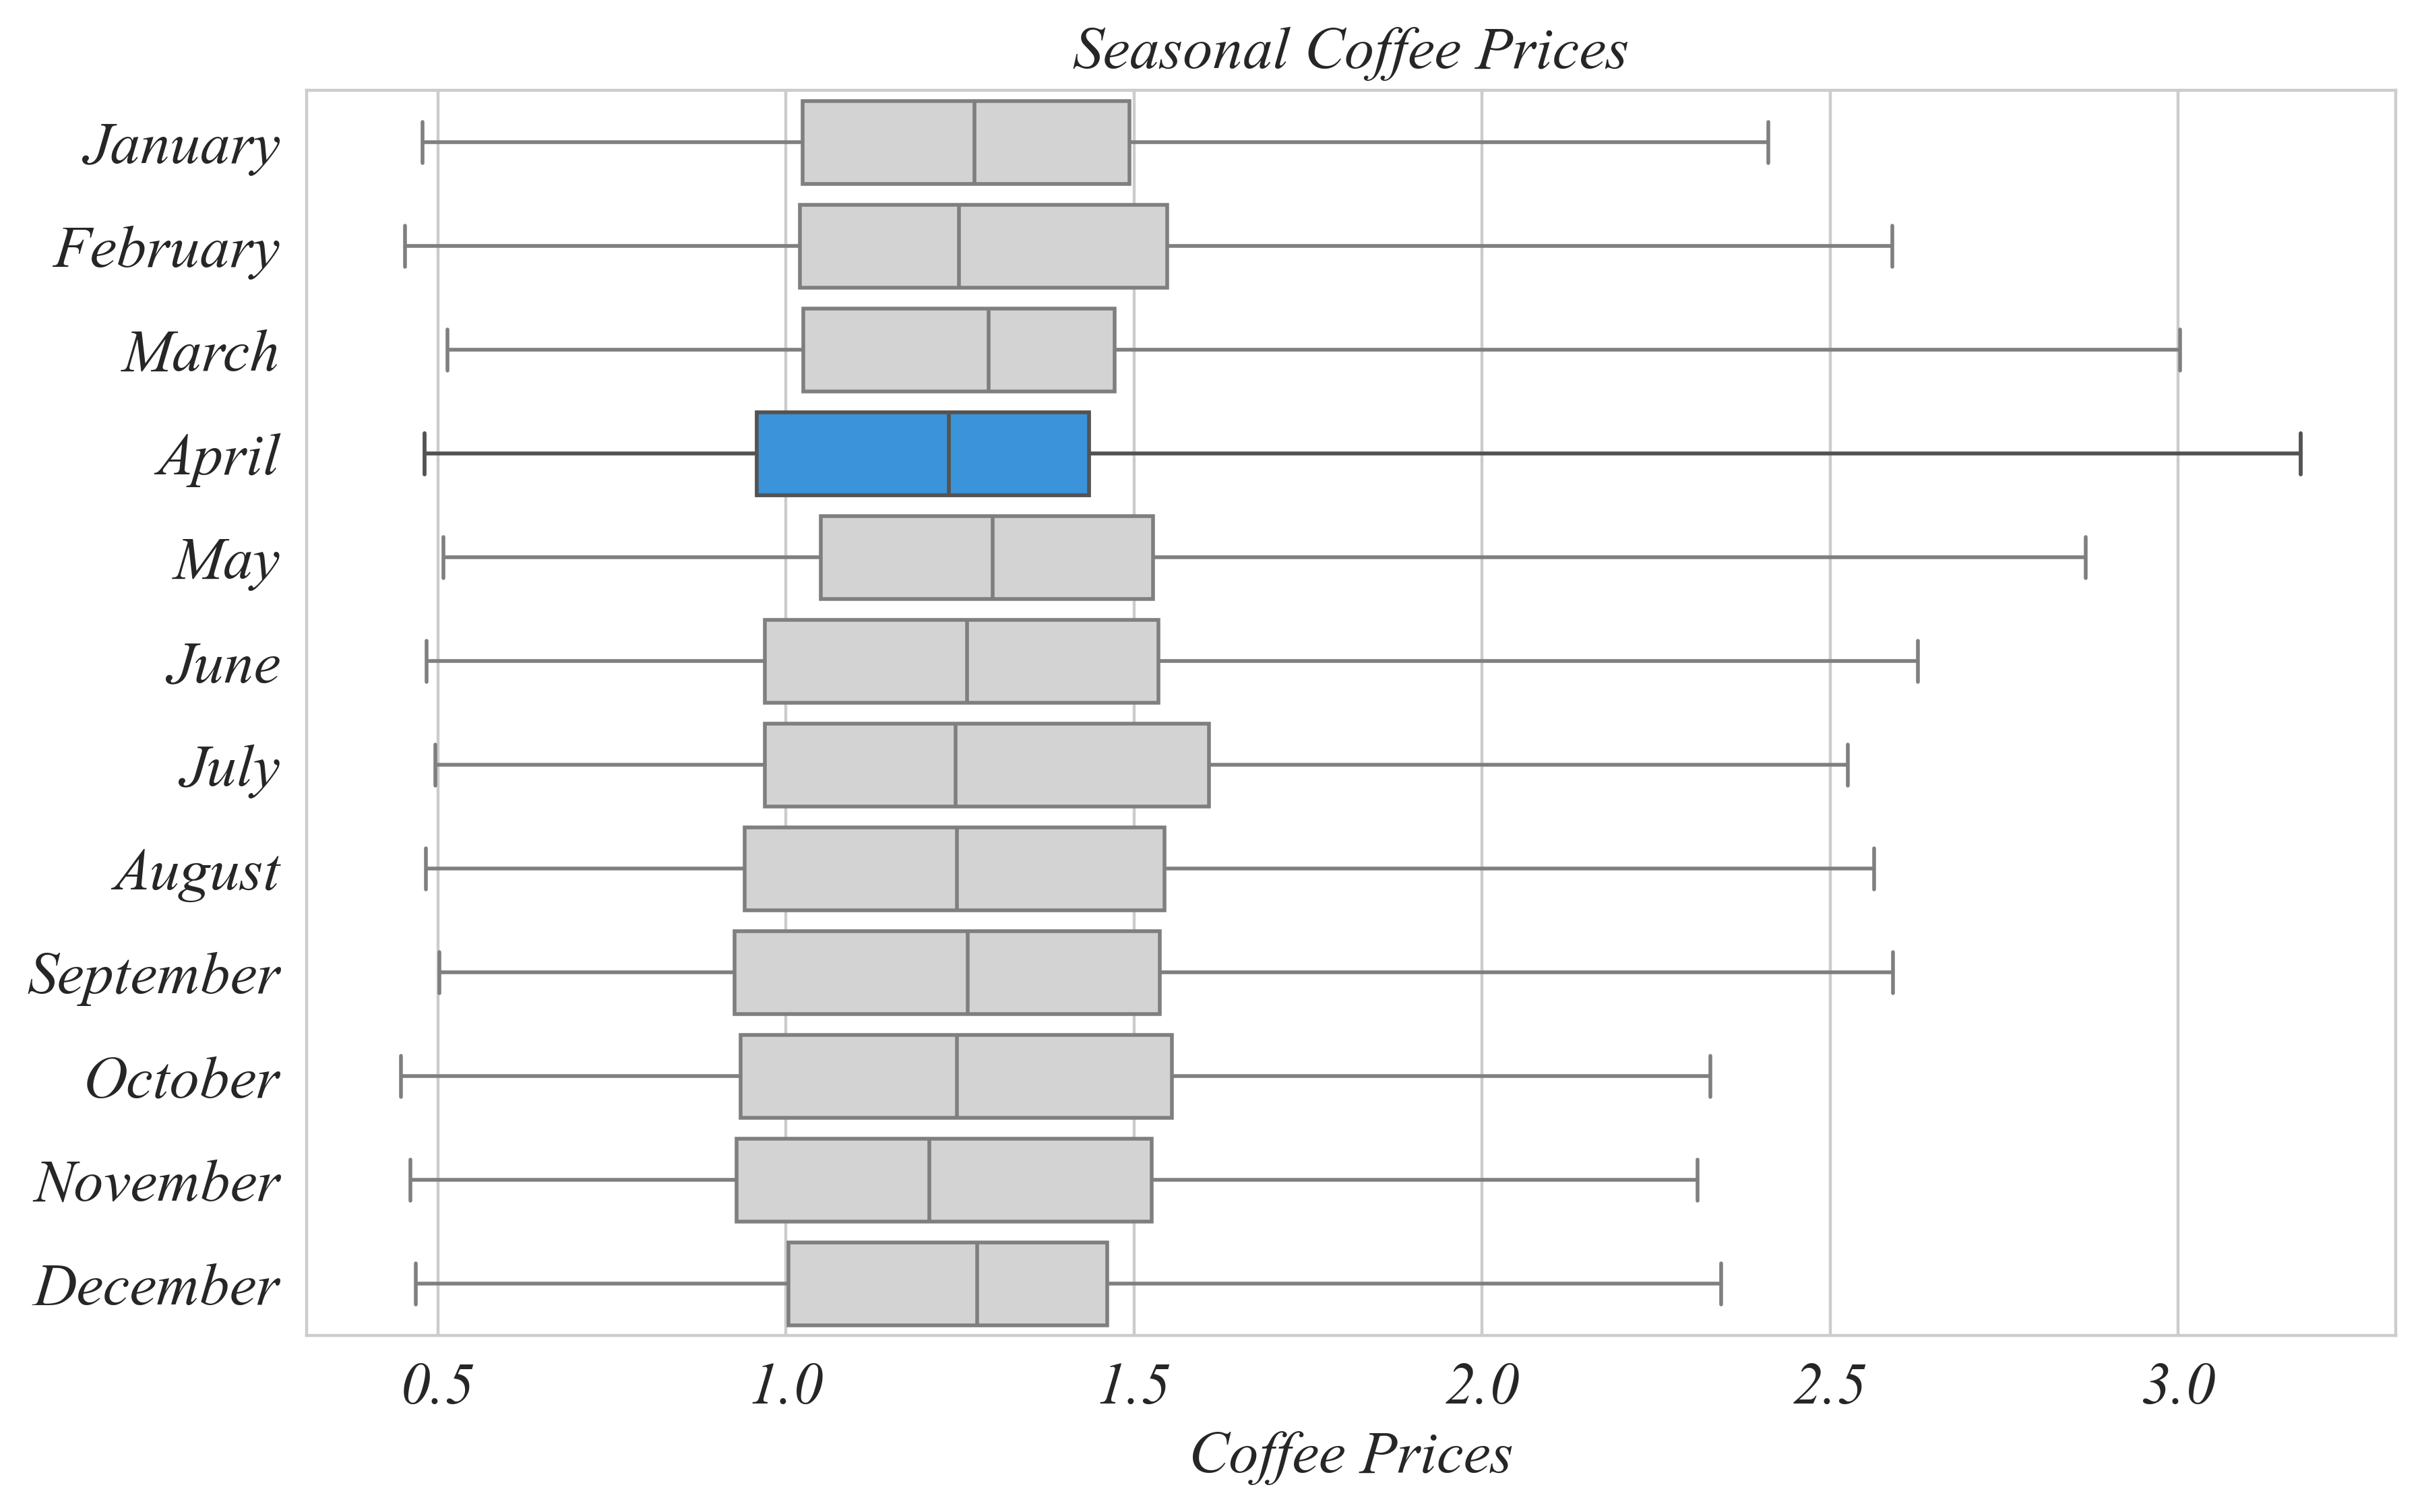

In [59]:
from Weidman_Figures import *
import calendar

fig, ax = Weid_Fig(height=6)

monthly_avg = pd.read_csv('Data/Part_1_8_Monthly_Coffee_Prices.csv', index_col=0)
monthly_avg['month'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)

monthly_avg_sorted = monthly_avg.sort_values('month')
monthly_avg_sorted = monthly_avg_sorted.reset_index(drop=True)

sns.boxplot(x='price', y='month', color='lightgrey', data=monthly_avg_sorted, whis=(0, 100), zorder=2, vert=False)

monthly_avg_sorted = monthly_avg_sorted[monthly_avg_sorted.month=='April']
sns.boxplot(x='price', y='month', color='#2196F3', data=monthly_avg_sorted, whis=(0, 100), zorder=2, vert=False)

plt.title('Seasonal Coffee Prices')
plt.xlabel('Coffee Prices')
plt.ylabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
#plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure14.png')

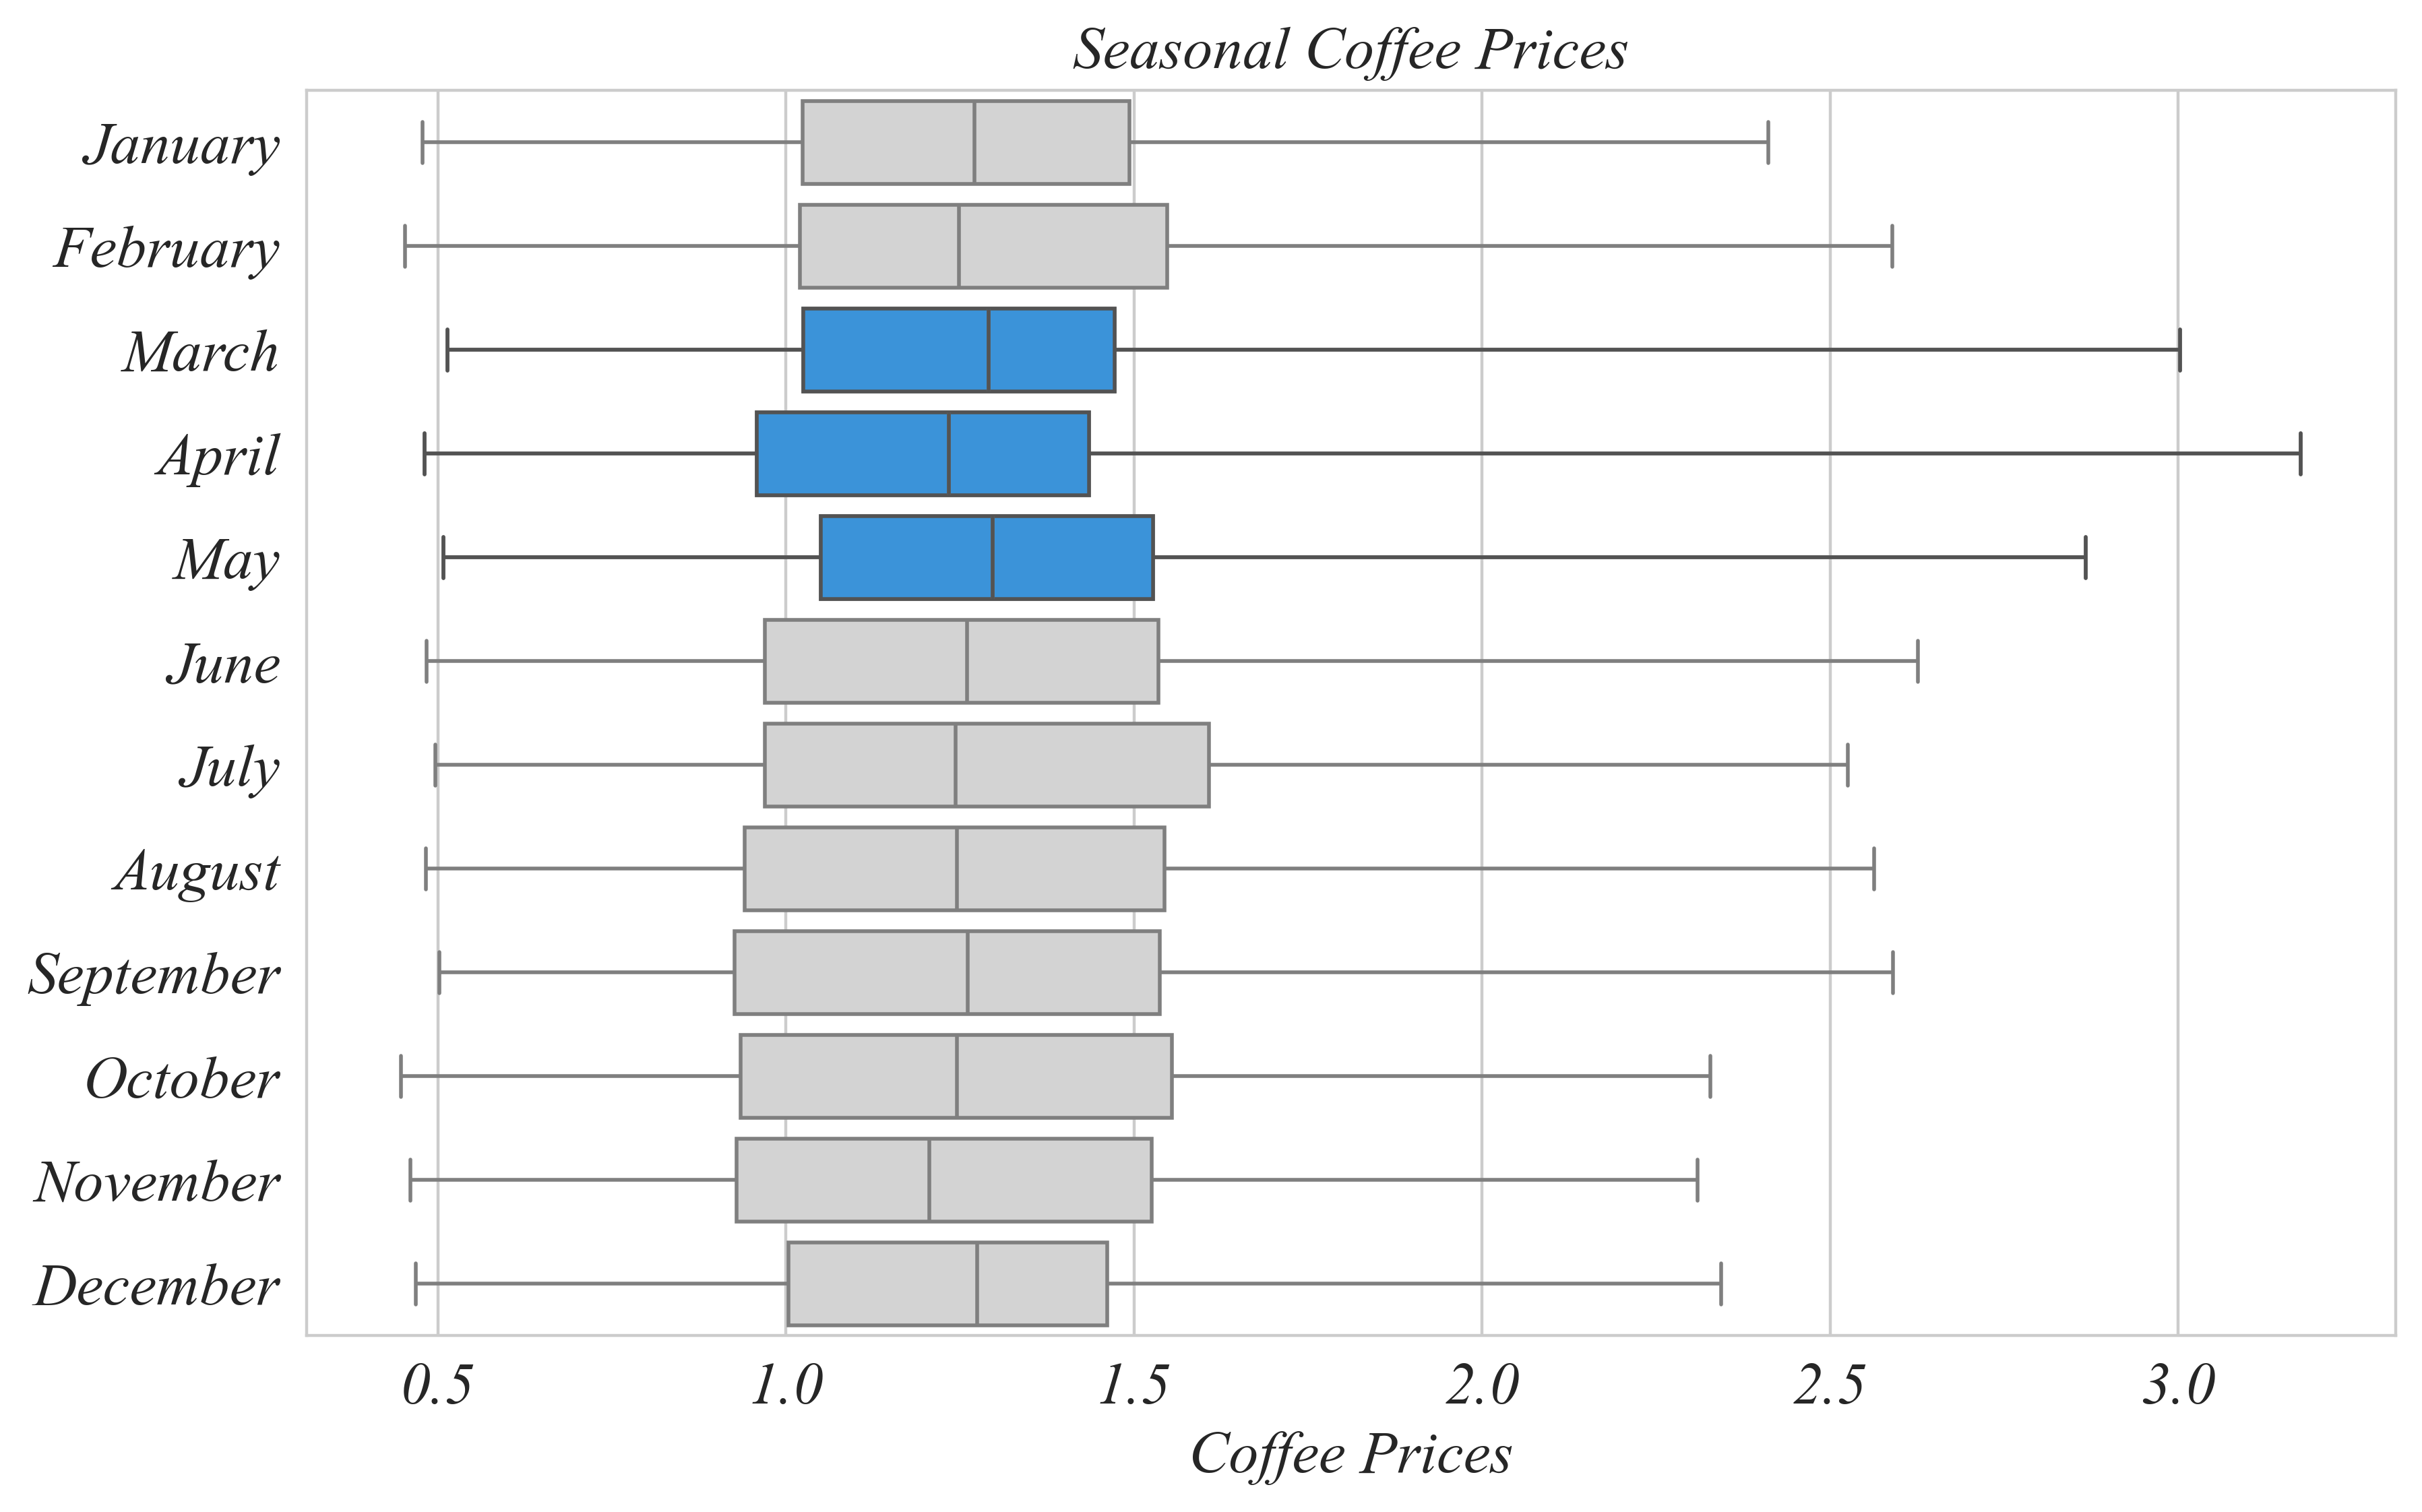

In [92]:
from Weidman_Figures import *
import calendar

fig, ax = Weid_Fig(height=6)

monthly_avg = pd.read_csv('Data/Part_1_8_Monthly_Coffee_Prices.csv', index_col=0)
monthly_avg['month'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)

monthly_avg_sorted = monthly_avg.sort_values('month')
monthly_avg_sorted = monthly_avg_sorted.reset_index(drop=True)

sns.boxplot(x='price', y='month', color='lightgrey', data=monthly_avg_sorted, whis=(0, 100), zorder=2, vert=False)

monthly_avg_sorted = monthly_avg_sorted[monthly_avg_sorted.month.isin(['March', 'April', 'May'])]
sns.boxplot(x='price', y='month', color='#2196F3', data=monthly_avg_sorted, whis=(0, 100), zorder=2, vert=False)
        
plt.title('Seasonal Coffee Prices')
plt.xlabel('Coffee Prices')
plt.ylabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')
#plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure15.png')

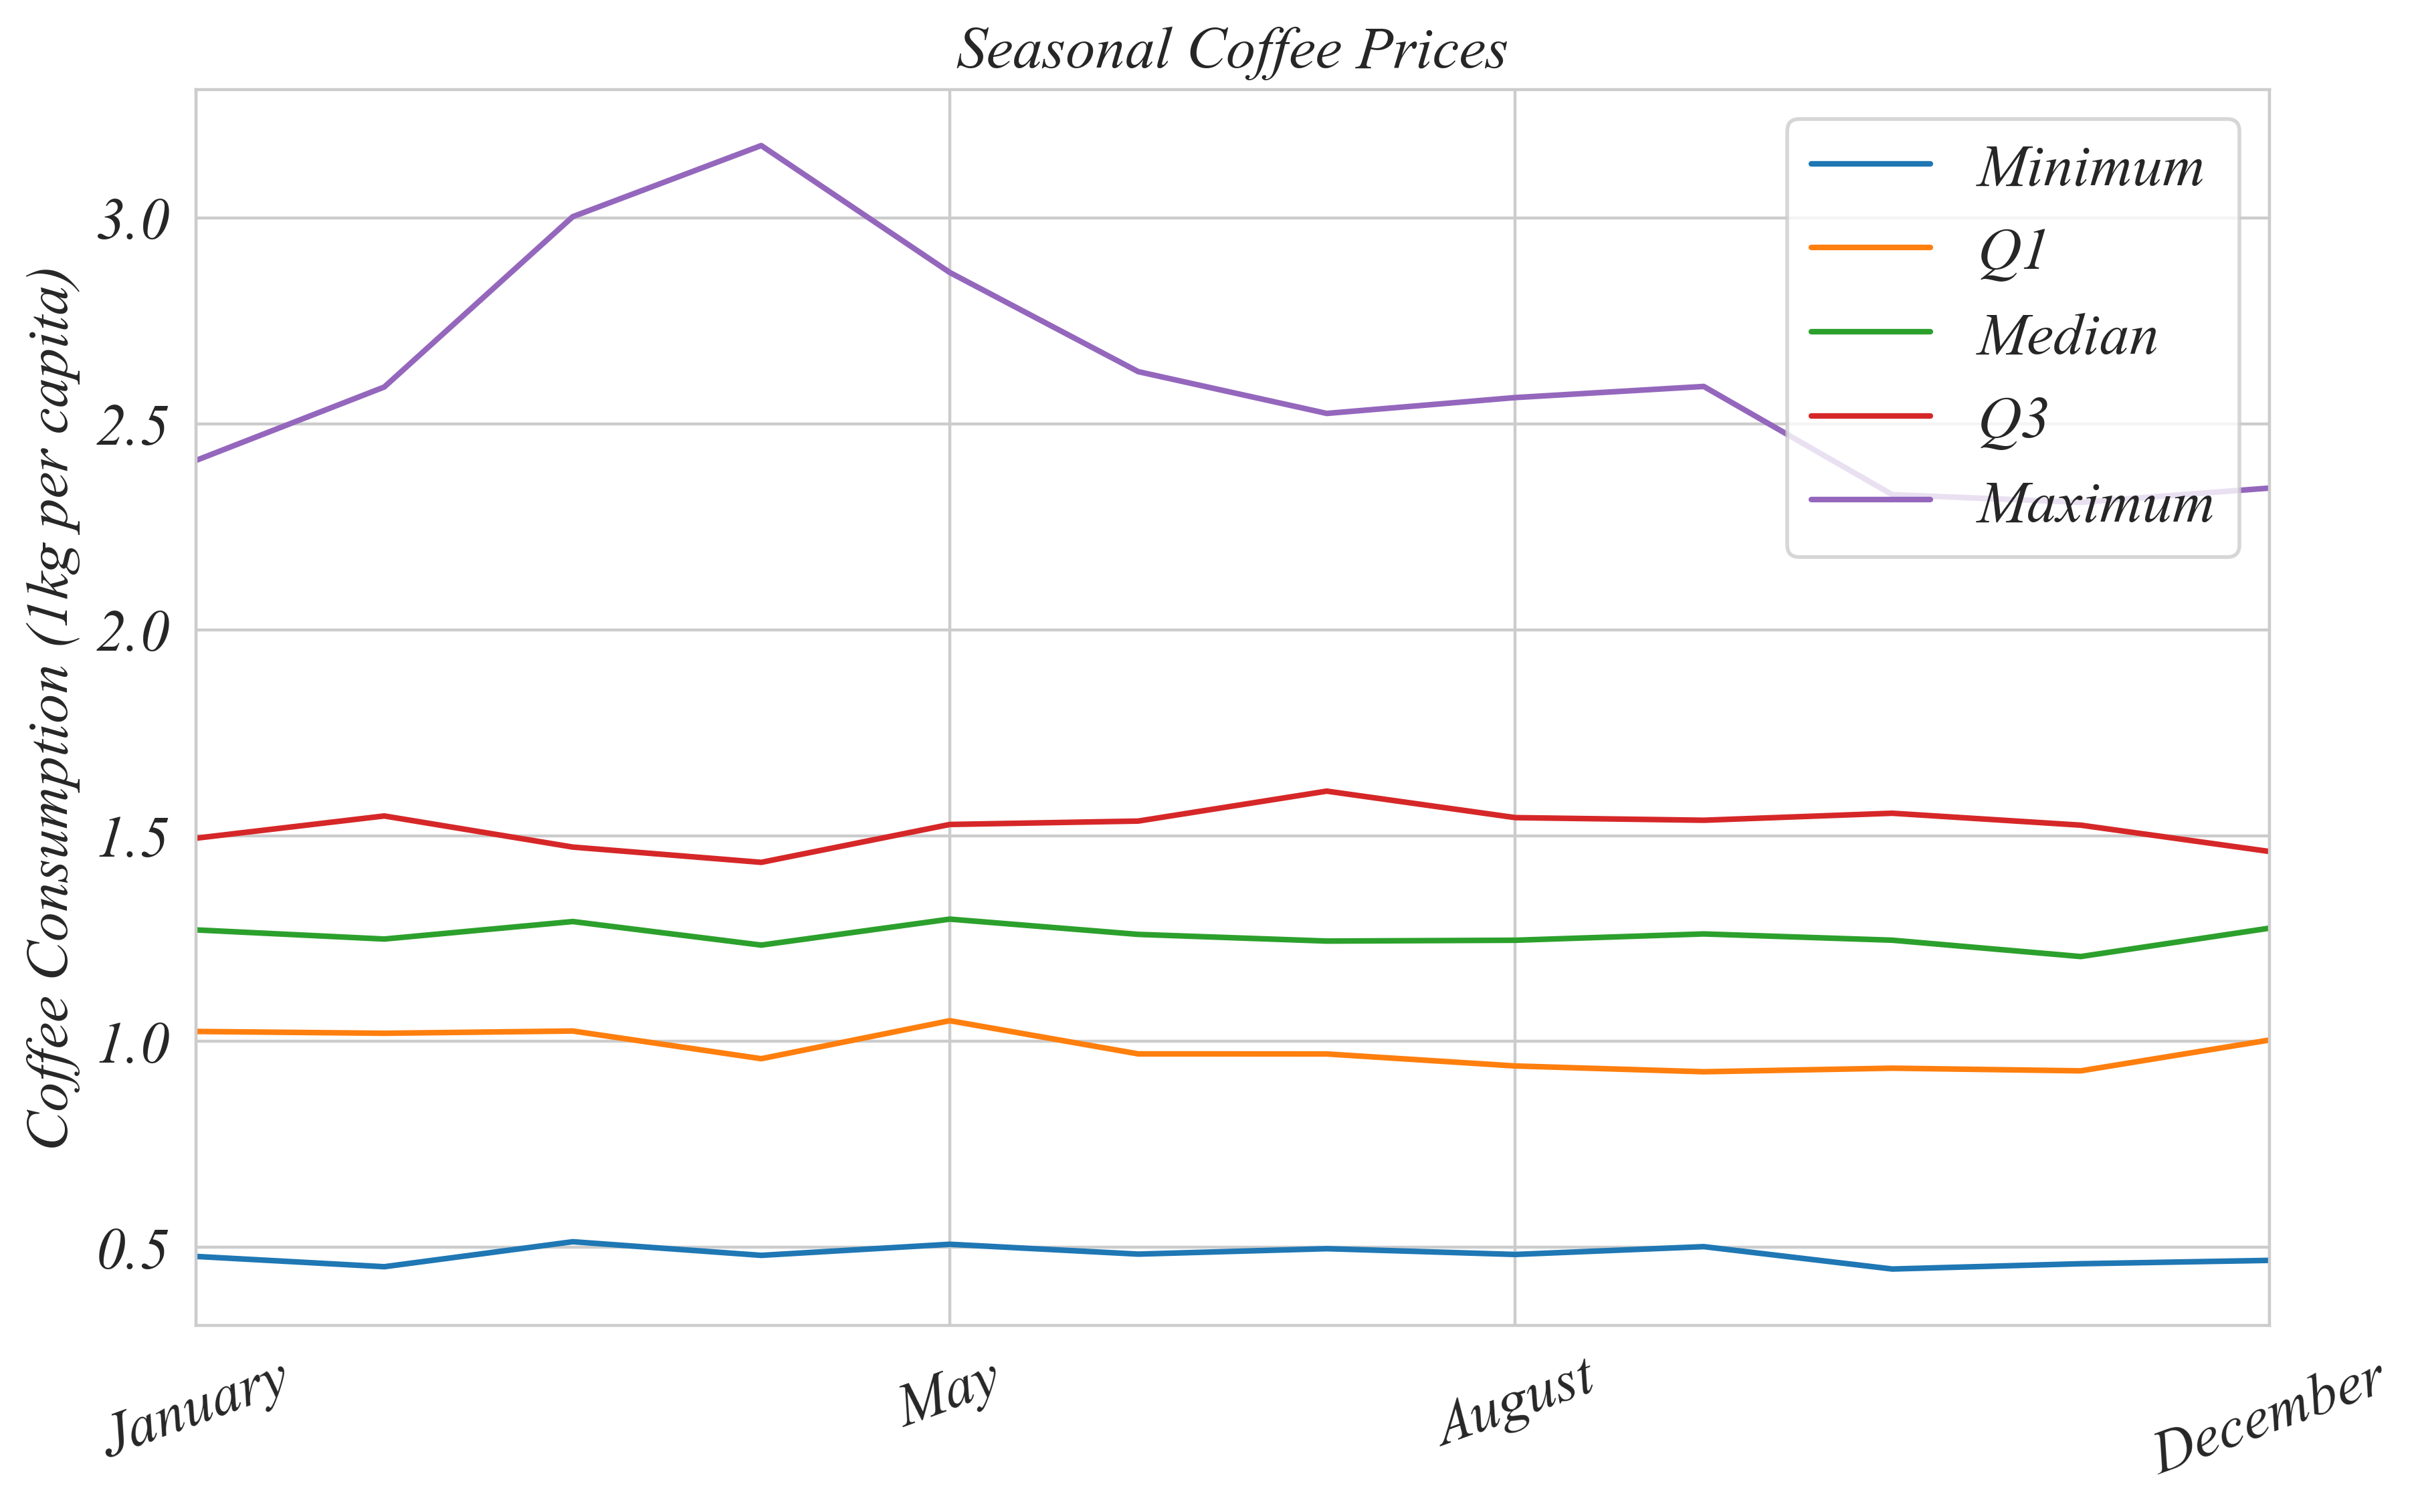

In [93]:
from Weidman_Figures import *
import calendar

fig, ax = Weid_Fig(height=6)

monthly_avg = pd.read_csv('Data/Part_1_8_Monthly_Coffee_Prices.csv', index_col=0)
monthly_avg['month'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)

minimum = []
q1 = []
median = []
q3 = []
maximum = []
months = []

for m in monthly_avg['month'].unique():
    month = monthly_avg[monthly_avg.month == m]

    minimum.append(month.price.min())
    q1.append(month.price.quantile(0.25))
    median.append(month.price.median())
    q3.append(month.price.quantile(0.75))
    maximum.append(month.price.max())

    months.append(m)

summary_df = pd.DataFrame({
    'Month': months,
    'Minimum': minimum,
    'Q1': q1,
    'Median': median,
    'Q3': q3,
    'Maximum': maximum
})
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
summary_df['Month'] = pd.Categorical(summary_df['Month'], categories=month_order, ordered=True)
summary_df_sorted = summary_df.sort_values('Month').reset_index(drop=True)

plt.plot(summary_df_sorted['Month'],summary_df_sorted['Minimum'], label='Minimum')
plt.plot(summary_df_sorted['Month'],summary_df_sorted['Q1'], label='Q1')
plt.plot(summary_df_sorted['Month'],summary_df_sorted['Median'], label='Median')
plt.plot(summary_df_sorted['Month'],summary_df_sorted['Q3'], label='Q3')
plt.plot(summary_df_sorted['Month'],summary_df_sorted['Maximum'], label='Maximum')

plt.title('Seasonal Coffee Prices')
plt.ylabel('Coffee Prices')
plt.ylabel('Coffee Consumption (1kg per capita)')
plt.xlabel('')
plt.xlim(0,11)
plt.xticks([0,4,7,11], rotation=20)
plt.legend()
#plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure16.png')

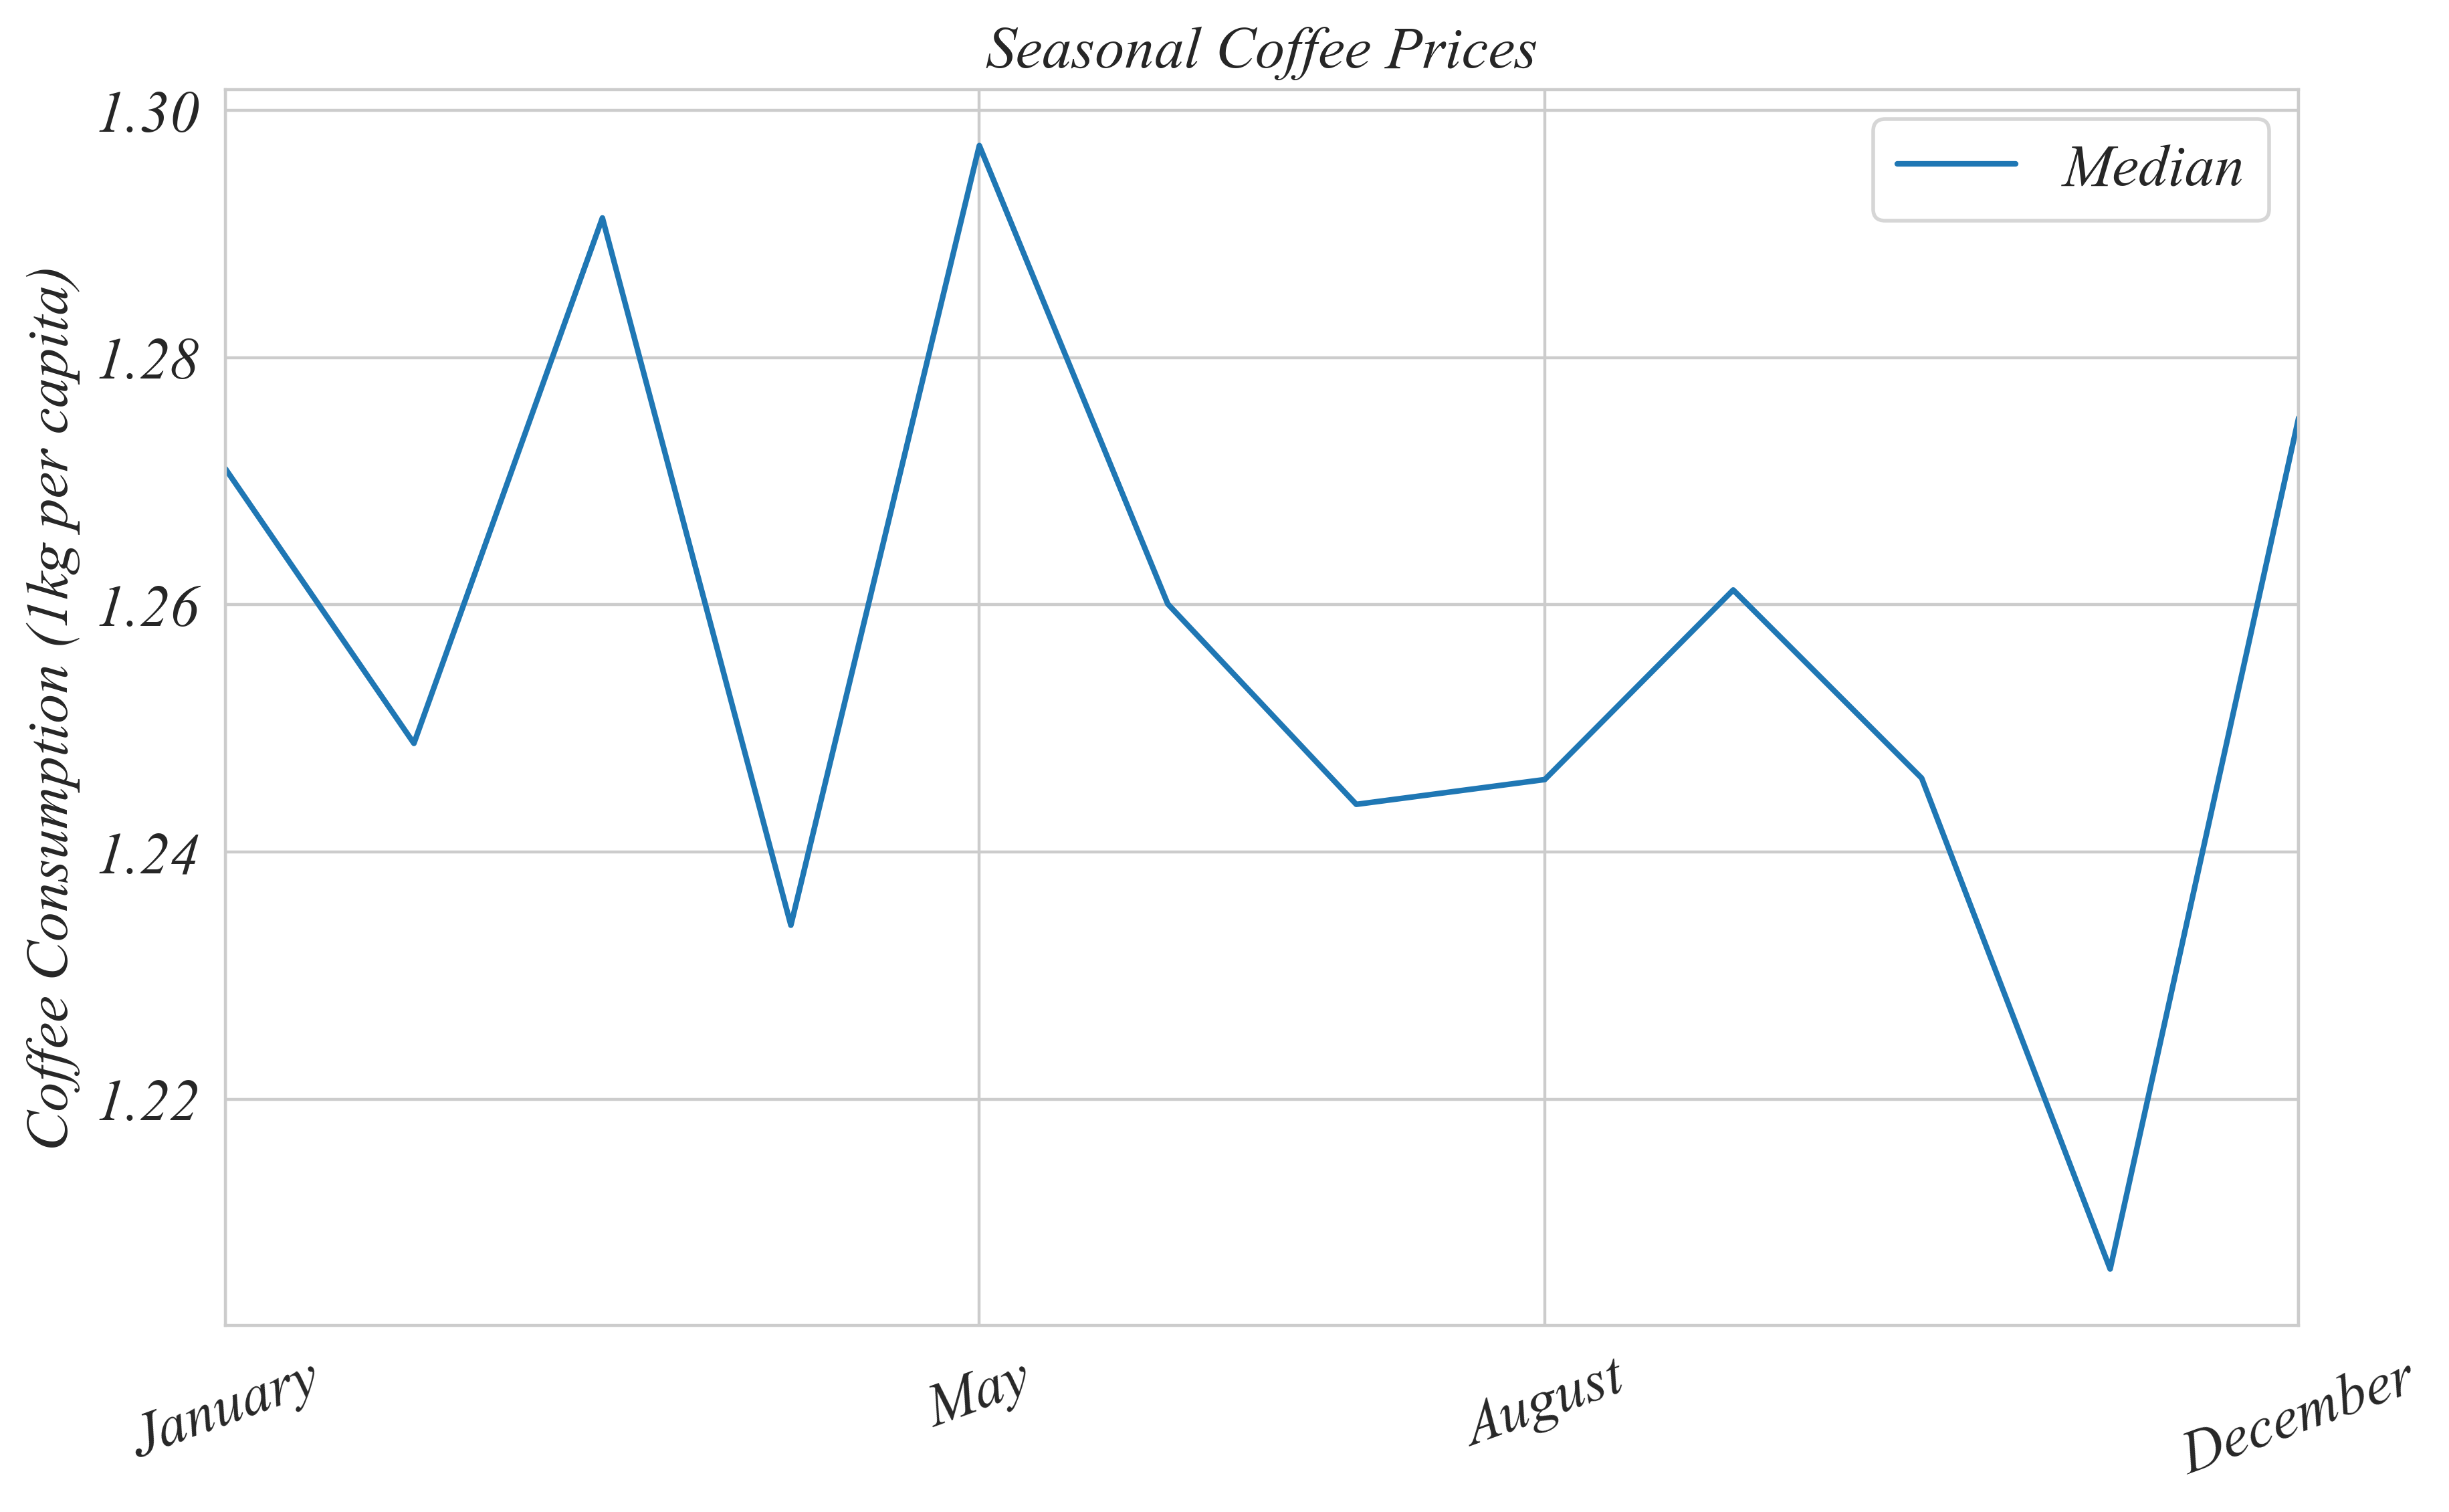

In [94]:
from Weidman_Figures import *
import calendar

fig, ax = Weid_Fig(height=6)

monthly_avg = pd.read_csv('Data/Part_1_8_Monthly_Coffee_Prices.csv', index_col=0)
monthly_avg['month'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)

minimum = []
q1 = []
median = []
q3 = []
maximum = []
months = []

for m in monthly_avg['month'].unique():
    month = monthly_avg[monthly_avg.month == m]

    minimum.append(month.price.min())
    q1.append(month.price.quantile(0.25))
    median.append(month.price.median())
    q3.append(month.price.quantile(0.75))
    maximum.append(month.price.max())

    months.append(m)

summary_df = pd.DataFrame({
    'Month': months,
    'Minimum': minimum,
    'Q1': q1,
    'Median': median,
    'Q3': q3,
    'Maximum': maximum
})
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
summary_df['Month'] = pd.Categorical(summary_df['Month'], categories=month_order, ordered=True)
summary_df_sorted = summary_df.sort_values('Month').reset_index(drop=True)

#plt.plot(summary_df_sorted['Month'],summary_df_sorted['Minimum'], label='Minimum')
#plt.plot(summary_df_sorted['Month'],summary_df_sorted['Q1'], label='Q1')
plt.plot(summary_df_sorted['Month'],summary_df_sorted['Median'], label='Median')
#plt.plot(summary_df_sorted['Month'],summary_df_sorted['Q3'], label='Q3')
#plt.plot(summary_df_sorted['Month'],summary_df_sorted['Maximum'], label='Maximum')

plt.title('Seasonal Coffee Prices')
plt.ylabel('Coffee Prices')
plt.ylabel('Coffee Consumption (1kg per capita)')
plt.xlabel('')
plt.xlim(0,11)
plt.xticks([0,4,7,11], rotation=20)
plt.legend()
#plt.tight_layout()
plt.savefig('Figures/Part_1_8_Figure17.png')